<img src="images/backdrop.png">
 
 
### Dates/Deadlines

Code: <i>05/05/2019 (one week before submission)</i><br />
Report: <i>12/05/2019 (12:00 - noon)</i><br />


### Tasks that need doing
 * Determine if holidays
 * Train Model using LightGBM (Caitlin)
 * Train Model using Ada Boost (Tze-yi)
 * Train Model using KNN (Runyu)
 * Train Model using random forest (Leyan)
 * Compare results of all regression methods
 
 
### Code consistency - Important

When programming your respective models, can you call your training method <b>train()</b> and testing method <b>test()</b>. That way we'll be able to call them from a single combining method (Frankenstein's Monster Regression Model). If you would rather call them something else, just let me know and we can disucss.

Also it would be great if you can add code to your model that allows you to save and load it.
 
### Report

<p>We need to submit seperate reports, so everyone needs to have enough to do and everyone needs enough time to write about what it is we have done</p>

 * "Each team member submits their own independent write up. They also submit all of the code for the entire team. You may want to use the universities github service"
 * "The report has a 3000 word limit and must be a pdf file"
 
### Mark Scheme

The key aim here is to go beyond ‘off-the-shelf’, that is, you need to implement a solution
that is justifiably customised to the problem to get full marks. This doesn’t necessarily mean
the machine learning algorithms are unique, but that the approach as a whole is. This can
include feature design, combining multiple algorithms (system or ensemble), using further
data, sneaky tricks etc. You get marks for being smart, not for being complicated.
This project is worth 30% of your marks for the unit: <br />

 *  <b>5 marks</b>: Clearly explaining the problem and identifying ways to go beyond a problem-agnostic machine learning approach.
 * <b>5 marks</b>: Clearly explaining the solution(s) of your team as a whole, including identifying which details of the problem it exploits and how.
 * <b>10 marks</b>: A technical write up of the module(s) you contributed to your team. What they contribute, how they work, technical details. If they have a model give it; summarise any optimisation that occurs.
 * <b>10 marks</b>: Iterative evidence driven improvement, e.g. using the results of experiments to identify weaknesses with the current solution, proposing and implementing fixes, and then verifying via further experiments. While you write this section yourself it may discuss everything done within the team.
 
for a total of <b>30 marks</b>

 
### Links

[Data](https://www.kaggle.com/c/nyc-taxi-trip-duration/data)<br />
[GitHub](https://github.com/Xethagona/Taxi-Coursework)<br />
[Spreadsheet](https://docs.google.com/spreadsheets/d/1oDq2rzWd1lVhdg2UYh2J4zRbN8XWPYKDrr4scczLoog/edit?usp=sharing)


### Comments

 * I'd recommend labelling and titling your graphs - Connor
 * A few more comments in the code would be nice, not sure where some numbers have come from - Connor

In [4]:
#Importing
import math
import pickle
import zipfile
import collections

import numpy as np 
import pandas as pd
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import sklearn.feature_selection as fs

from math import sqrt
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.decomposition import PCA
from timeit import default_timer as timer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as rfr

%matplotlib inline

<hr style="height: 1.0px;"/>

### Control Panel

In order to speed things up, the user can either load the model from a file or re-run the model.

In [2]:
loadModel = True
saveModel = True
runModel = True
removeOutlier = True

<hr style="height: 1.0px;"/>

### Reading data from ZIP and converting to Pandas - Layan & Connor

Keeping the training and testing dataset as zip files reduces the file size 

In [3]:
#Creating zipFile instances 
training_zip = zipfile.ZipFile('train.zip') 
testing_zip = zipfile.ZipFile('test.zip') 
weather_zip = zipfile.ZipFile('2016-weather.zip')
weather_hourly_zip = zipfile.ZipFile('2016-hourlyWeather.zip')
fastest_route_test_zip = zipfile.ZipFile('fastest_routes_test.zip')
fastest_route_train_1_zip = zipfile.ZipFile('fastest_routes_train_part_1.zip')
fastest_route_train_2_zip = zipfile.ZipFile('fastest_routes_train_part_2_new.zip')
fastest_route_train_3_zip = zipfile.ZipFile('fastest_routes_train_part_3_new.zip')
stormWarning_zip = zipfile.ZipFile('NY_Storm_Events_2016.zip')
NYCweather_zip = zipfile.ZipFile("NYCweather2016.zip")

#Reading CSV file from zipFile instance 
train = pd.read_csv(training_zip.open('train.csv'))
test = pd.read_csv(testing_zip.open('test.csv'))
weather = pd.read_csv(weather_zip.open('weather_data_nyc_centralpark_2016(1).csv'))
weather_hourly = pd.read_csv(weather_hourly_zip.open('Weather.csv'))
fastest_route_test = pd.read_csv(fastest_route_test_zip.open('fastest_routes_test.csv'))
fastest_route_train_1 = pd.read_csv(fastest_route_train_1_zip.open('fastest_routes_train_part_1.csv'))
fastest_route_train_2 = pd.read_csv(fastest_route_train_2_zip.open('fastest_routes_train_part_2_new.csv'))
fastest_route_train_3 = pd.read_csv(fastest_route_train_3_zip.open('fastest_routes_train_part_3_new.csv'))
stormWarning = pd.read_csv(stormWarning_zip.open('NY_Storm_Events_2016.csv'))
NYCweather = pd.read_csv(NYCweather_zip.open('KNYC_Metars.csv'))

### Data visualising - Leyan

In [7]:
train = train.dropna()
### remove the text 'id' in the id column
train['id'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
train.sort_values(by='id').reset_index(drop=True)
print("Done") #Removes the large output

Done


In [8]:
### visualisation

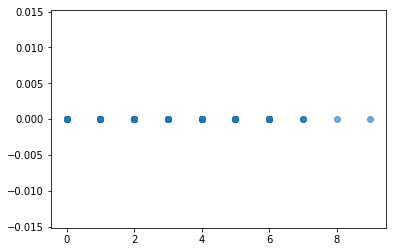

In [9]:
x1=train['passenger_count'].values
y1=np.zeros(1458644)
plt.scatter(x1,y1,alpha=0.6)
plt.show() 

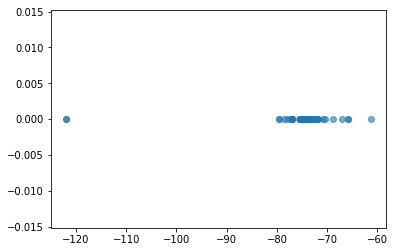

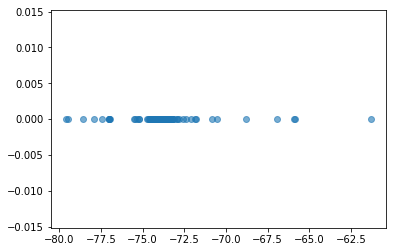

In [10]:
x2=train['pickup_longitude'].values
y2=np.zeros(1458644)

plt.scatter(x2,y2,alpha=0.6)
plt.show()

index_drop = train.index[train['pickup_longitude'] < -120].tolist()
train = train.drop(index_drop)

train[train['pickup_longitude'] < -120]

x2=train['pickup_longitude'].values
y2=np.zeros(1458642)
plt.scatter(x2,y2,alpha=0.6)
plt.show()                 

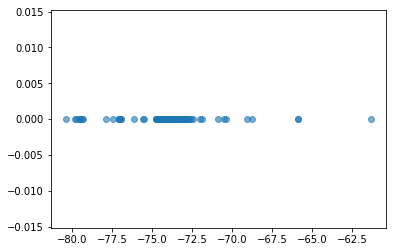

In [11]:
x3=train['dropoff_longitude']. values
y3=np.zeros(1458642)
plt.scatter(x3,y3,alpha=0.6)
plt.show()



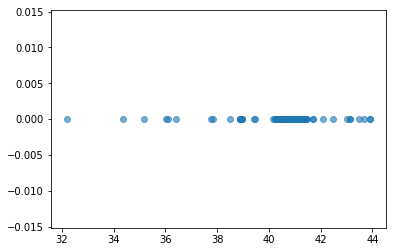

In [12]:
x4=train['dropoff_latitude'].values
y4=np.zeros(1458642)
plt.scatter(x4,y4,alpha=0.6)
plt.show()



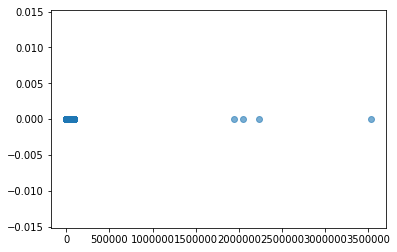

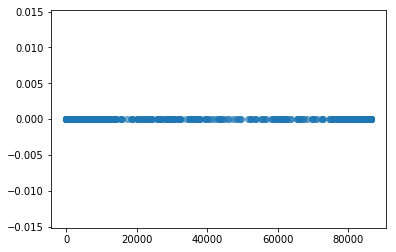

In [13]:
x5=train['trip_duration'].values
y5=np.zeros(1458642)
plt.scatter(x5,y5,alpha=0.6)
plt.show()


index_drop = train.index[train['trip_duration'] >1500000].tolist()
train = train.drop(index_drop)
#display(train)


x5=train['trip_duration'].values
y5=np.zeros(1458638)
plt.scatter(x5,y5,alpha=0.6)
plt.show()

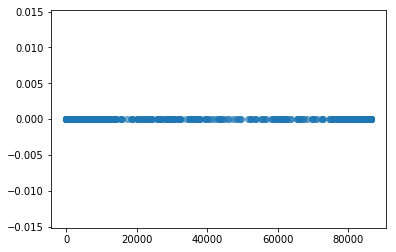

In [14]:
x5=train['trip_duration'].values
y5=np.zeros(1458638)
plt.scatter(x5,y5,alpha=0.6)
plt.show()

<hr style="height: 1.0px;"/>

### Data Preprocessing - Connor

Investigating averages from the data

Data: 19/04/2019

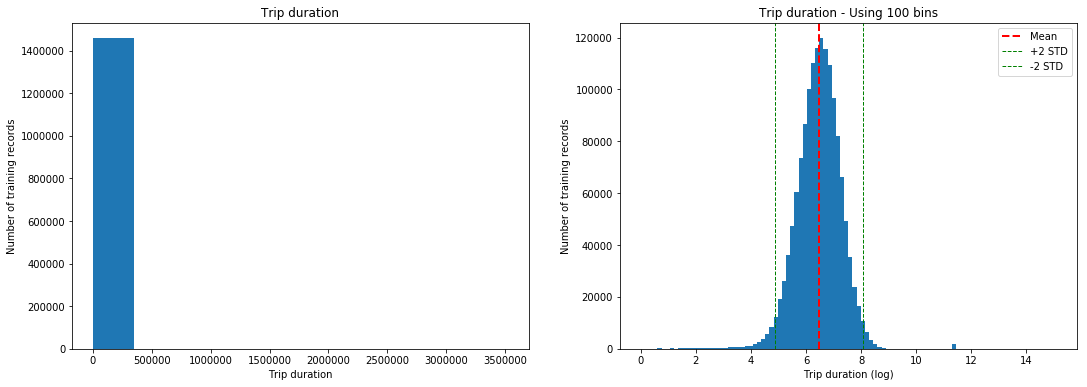

In [5]:
#Average length of a trip (Add log)
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.hist(train['trip_duration'])
plt.title("Trip duration")
plt.xlabel("Trip duration")
plt.ylabel("Number of training records")
plt.subplot(1, 2, 2)
plt.hist(np.log(train['trip_duration']), bins=100)
plt.axvline(np.log(train['trip_duration']).mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.axvline(np.log(train['trip_duration']).mean() + 2*np.log(train['trip_duration']).std(), color='green', linestyle='dashed', linewidth=1, label="+2 STD")
plt.axvline(np.log(train['trip_duration']).mean() + -2*np.log(train['trip_duration']).std(), color='green', linestyle='dashed', linewidth=1, label="-2 STD")
plt.title("Trip duration - Using 100 bins")
plt.xlabel("Trip duration (log)")
plt.ylabel("Number of training records")
plt.legend()
plt.show()

Trips duration longer than:
	1.5 Hours: 3097 | 0.212%
	2.0 Hours: 2253 | 0.154%
	3.0 Hours: 2112 | 0.145%

Trips duration shorter than:
	30 Seconds: 4890 | 0.335%
	60 Seconds: 8777 | 0.602%


Removing: 7987 rows


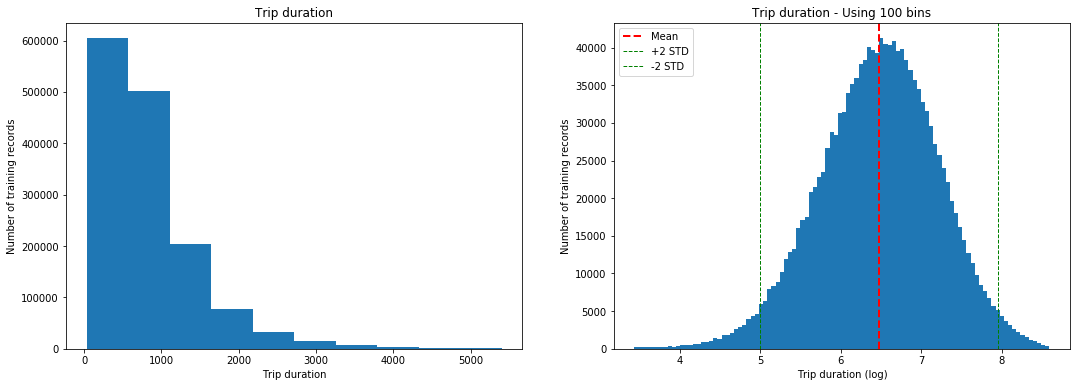

In [6]:
#Removing trips longer than or short than specfic values
longThan  = (60*60)* 2 #2 hours
longThan2 = (60*60)* 3 #3 hours
longThan3 = (60*60)* 1.5 #1.5 hours
shortThan = 30 #30 seconds
shortThan2 = 60 #1 minute

temp = train.copy() #deep copy

print("Trips duration longer than:")
print('\t1.5 Hours: %d | %0.3f%%' % (sum(temp['trip_duration'] > longThan3), (sum(temp['trip_duration'] > longThan3)/len(temp))*100))
print('\t2.0 Hours: %d | %0.3f%%' % (sum(temp['trip_duration'] > longThan), (sum(temp['trip_duration'] > longThan)/len(temp))*100))
print('\t3.0 Hours: %d | %0.3f%%' % (sum(temp['trip_duration'] > longThan2), (sum(temp['trip_duration'] > longThan2)/len(temp))*100))
print("")

print("Trips duration shorter than:")
print('\t30 Seconds: %d | %0.3f%%' % (sum(temp['trip_duration'] <= shortThan), (sum(temp['trip_duration'] <= shortThan)/len(temp))*100))
print('\t60 Seconds: %d | %0.3f%%' % (sum(temp['trip_duration'] <= shortThan2), (sum(temp['trip_duration'] <= shortThan2)/len(temp))*100))
print("\n")

print("Removing:", sum(temp['trip_duration'] <= shortThan) + sum(temp['trip_duration'] > longThan3), "rows")
temp = temp.drop(temp[temp.trip_duration > longThan3].index)
temp = temp.drop(temp[temp.trip_duration <= shortThan].index)


plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.hist(temp['trip_duration'])
plt.title("Trip duration")
plt.xlabel("Trip duration")
plt.ylabel("Number of training records")
plt.subplot(1, 2, 2)
plt.hist(np.log(temp['trip_duration']), bins=100)
plt.axvline(np.log(temp['trip_duration']).mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.axvline(np.log(temp['trip_duration']).mean() + 2*np.log(temp['trip_duration']).std(), color='green', linestyle='dashed', linewidth=1, label="+2 STD")
plt.axvline(np.log(temp['trip_duration']).mean() + -2*np.log(temp['trip_duration']).std(), color='green', linestyle='dashed', linewidth=1, label="-2 STD")
plt.title("Trip duration - Using 100 bins")
plt.xlabel("Trip duration (log)")
plt.ylabel("Number of training records")
plt.legend()
plt.show()

if(removeOutlier):
    train = temp 

In [7]:
#Checking for duplicate fields and for impossible results
print("Duplicate fields (Train): ", train.duplicated().sum())
print("Duplicate fields (Test): ", train.duplicated().sum())
print("Duplicate ID fields (Train): ",train.id.duplicated().sum())
print("Duplicate ID fields: (Test)",test.id.duplicated().sum())
print("Number of error fields: ", sum(train.dropoff_datetime < train.pickup_datetime))

Duplicate fields (Train):  0
Duplicate fields (Test):  0
Duplicate ID fields (Train):  0
Duplicate ID fields: (Test) 0
Number of error fields:  0


<hr style="height: 1.0px;"/>

### Comparing the 'Vendor' vs 'Trip Duration' - Caitlin

It might be of interest to see the average trip duration for each vendor. Maybe plot two histographs over one another?

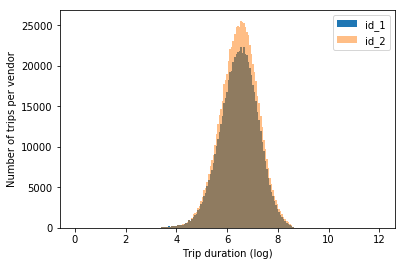

In [8]:
#CODE
id_1 = train.copy()
id_1 = id_1.drop(id_1[id_1.vendor_id == 2].index)
id_2 = train.copy()
id_2 = id_2.drop(id_2[id_2.vendor_id == 1].index)

bins = np.linspace(0, 12, 200)

plt.hist(np.log(id_1['trip_duration']), bins, label='id_1')
plt.hist(np.log(id_2['trip_duration']), bins,alpha=0.5, label='id_2')
plt.legend(loc='upper right')
plt.xlabel('Trip duration (log)')
plt.ylabel('Number of trips per vendor')
#plt.savefig('fig_1')
plt.show()

<hr style="height: 1.0px;"/>

### Normalise time data - Connor

Removing the column 'pickup_datetime' and replacing it with four new columns:
  * pickup_year
  * pickup_month
  * pickup_hour
  * pickup_minute
  * pickup_second

It might also be of interest to see what impact the time of pickup has on the duration of the trip or weather or not it is during work hours. As a result, several new columns have been added:

 * workTime - referring to whether or not the pickup was between 9am and 5pm 
 * lateNight - referring to whether or not the pickup was between 10pm and 6am
 * weekday - referring to whether or not the pickup was during a weekday (Monday - Friday)

#### Things need doing
 * Determine if some trips are taking forever
 * Determine if its a holiday 

Date: 19/04/2019

<hr style="height: 1.0px;"/>

### Data Cleaning and Feature Reduction - Connor

Date: 19/04/2019

In [9]:
#Normalise time data

#Current 'pickup_datetime' format: 2016-03-14 17:24:55 OR YYYY-MM-DD HH:MM:SS
train[['Date','Time']] = train.pickup_datetime.str.split(" ",expand=True,)
train[['pickup_Year','pickup_Month','pickup_Day']] = train.Date.str.split("-",expand=True,)
train[['pickup_Hour','pickup_Minute','pickup_Second']] = train.Time.str.split(":",expand=True,)

#Dropping columns
train = train.drop('pickup_datetime',1)
train = train.drop('Date',1)
train = train.drop('Time',1)
train = train.drop('pickup_Second',1)

In [10]:
#Determining if working hours 
startWork = "09" #9am
endWork = "17" #5pm

startLateNight = "22" #10pm
endLateNight = "06" #6am
    
def workTime(row):
    if((row['pickup_Hour'] >= startWork) and (row['pickup_Hour'] <= endWork)):
        return 1
    else:
        return 0
    
def lateNight(row):
    if((row['pickup_Hour'] >= startLateNight) or (row['pickup_Hour'] <= endLateNight)):
        return 1
    else:
        return 0
    
def weekday(row):
    df = pd.Timestamp(row['pickup_Year'] + "-" + row['pickup_Month'] + "-" + row['pickup_Day'])
    
    if df.dayofweek<5:
        return 1
    else:
        return 0

#Determing if during workTime, lateNight and weekday
train['workTime'] = train.apply (lambda x: workTime(x), axis=1)
train['lateNight'] = train.apply (lambda x: lateNight(x), axis=1)
train['weekday'] = train.apply (lambda x: weekday(x), axis=1)

<hr style="height: 1.0px;"/>

### Determing if holiday or not - Caitlin

* words *

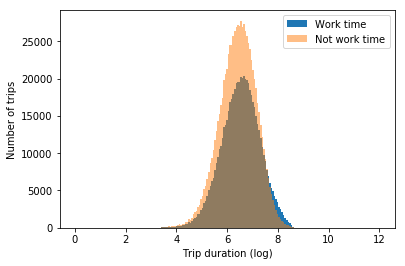

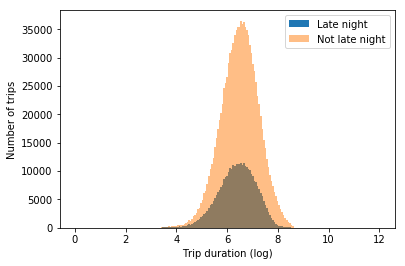

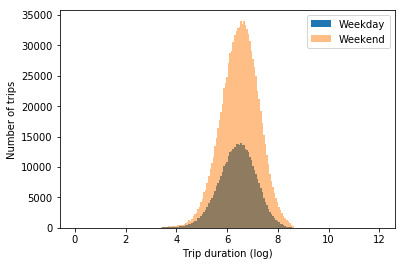

In [11]:
workTime = train.copy()
workTime = workTime.drop(workTime[workTime.workTime == 0].index)
notworkTime = train.copy()
notworkTime = notworkTime.drop(notworkTime[notworkTime.workTime == 1].index)

bins = np.linspace(0, 12, 200)

plt.hist(np.log(workTime['trip_duration']), bins, label='Work time')
plt.hist(np.log(notworkTime['trip_duration']), bins,alpha=0.5, label='Not work time')
plt.legend(loc='upper right')
plt.xlabel('Trip duration (log)')
plt.ylabel('Number of trips')
#plt.savefig('fig_2')
plt.show()


lateNight = train.copy()
lateNight = lateNight.drop(lateNight[lateNight.lateNight == 0].index)
notlateNight = train.copy()
notlateNight = notlateNight.drop(notlateNight[notlateNight.lateNight == 1].index)

bins = np.linspace(0, 12, 200)

plt.hist(np.log(lateNight['trip_duration']), bins, label='Late night')
plt.hist(np.log(notlateNight['trip_duration']), bins,alpha=0.5, label='Not late night')
plt.legend(loc='upper right')
plt.xlabel('Trip duration (log)')
plt.ylabel('Number of trips')
#plt.savefig('fig_3')
plt.show()



weekday = train.copy()
weekday = weekday.drop(weekday[weekday.weekday == 1].index)
weekend = train.copy()
weekend = weekend.drop(weekend[weekend.weekday == 0].index)

bins = np.linspace(0, 12, 200)

plt.hist(np.log(weekday['trip_duration']), bins, label='Weekday')
plt.hist(np.log(weekend['trip_duration']), bins,alpha=0.5, label='Weekend')
plt.legend(loc='upper right')
plt.xlabel('Trip duration (log)')
plt.ylabel('Number of trips')
#plt.savefig('fig_4')
plt.show()

<hr style="height: 1.0px;"/>

### Calculate the distance travelled - Connor

It might be of interest to determine how far the taxi has travelled (could help spot potential outliers)<br />
Using the equation below: <br /><br />

<center>
       <img src="images/distanceEquation2.png"><br />
       Source: <a href="https://andrew.hedges.name/experiments/haversine/">Finding distances based on Latitude and Longitude</a>
</center>

The distance between the starting location and final location will be calculated. Obviously this distance will be an approximation as it is impossible to determine the route taken. This distance will be "as the crow flies".

<br />

The distance travelled has very long tails, as a result, the distances over and under specific values could dropped?



C:\Users\xetha\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Users\xetha\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


ValueError: max must be larger than min in range parameter.

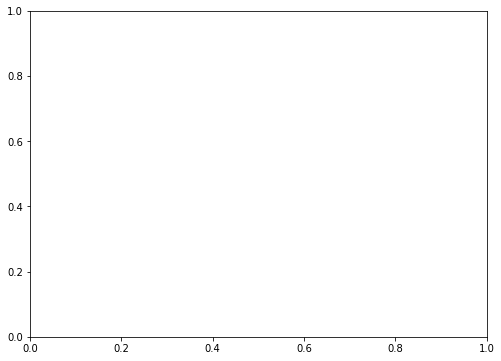

In [7]:
#Approximate radius of earth
R = 3961 #Miles
#R = 6373 #Km


def distance(row):
    lat1 = math.radians(row['pickup_latitude'])
    lon1 = math.radians(row['pickup_longitude'])
    
    lat2 = math.radians(row['dropoff_latitude'])
    lon2 = math.radians(row['dropoff_longitude'])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    temp = (R * c)
    if(temp <= 0):
        #No movement
        return np.nan
    return temp
    
train['distanceTravelled'] = train.apply (lambda x: distance(x), axis=1)

#Some of the fields had no movement and as a result are dropped
train.dropna()

#Plotting the distance travelled on a histograph for observation purposes 
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.hist(train['distanceTravelled'])
plt.title("Distance travelled")
plt.xlabel("Distance travelled")
plt.ylabel("Number of training records")
plt.subplot(1, 2, 2)
plt.hist(np.log(train['distanceTravelled']), bins=100)
plt.axvline(np.log(train['distanceTravelled']).mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.axvline(np.log(train['distanceTravelled']).mean() + 2*np.log(train['distanceTravelled']).std(), color='green', linestyle='dashed', linewidth=1, label="+2 STD")
plt.axvline(np.log(train['distanceTravelled']).mean() + -2*np.log(train['distanceTravelled']).std(), color='green', linestyle='dashed', linewidth=1, label="-2 STD")
plt.title("Distance travelled - Using 100 bins")
plt.xlabel("Distance travelled (log)")
plt.ylabel("Number of training records")
plt.legend()
plt.show()

In [ ]:

temp = train.copy()

print("Trips travelled further than:")
print('\t20 miles: %d | %0.3f%%' % (sum(temp['distanceTravelled'] > 20), (sum(temp['distanceTravelled'] > 20)/len(temp))*100))
print('\t100 miles: %d | %0.3f%%' % (sum(temp['distanceTravelled'] > 100), (sum(temp['distanceTravelled'] > 100)/len(temp))*100))
print("")

print("Trips travelled less than:")
print('\t0.10 miles: %d | %0.3f%%' % (sum(temp['distanceTravelled'] <= 0.1), (sum(temp['distanceTravelled'] <= 0.1)/len(temp))*100))
print('\t0.01 miles: %d | %0.3f%%' % (sum(temp['distanceTravelled'] <= 0.01), (sum(temp['distanceTravelled'] <= 0.01)/len(temp))*100))
print("\n")

print("Removing:", sum(temp['distanceTravelled'] > 20) + sum(temp['distanceTravelled'] <= 0.1), "rows")
temp = temp.drop(temp[temp.distanceTravelled > 20].index)
temp = temp.drop(temp[temp.distanceTravelled <= 0.1].index)



#Plotting the distance travelled on a histograph for observation purposes 
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.hist(temp['distanceTravelled'])
plt.title("Distance travelled")
plt.xlabel("Distance travelled")
plt.ylabel("Number of training records")
plt.subplot(1, 2, 2)
plt.hist(np.log(temp['distanceTravelled']), bins=100)
plt.axvline(np.log(temp['distanceTravelled']).mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.axvline(np.log(temp['distanceTravelled']).mean() + 2*np.log(temp['distanceTravelled']).std(), color='green', linestyle='dashed', linewidth=1, label="+2 STD")
plt.axvline(np.log(temp['distanceTravelled']).mean() + -2*np.log(temp['distanceTravelled']).std(), color='green', linestyle='dashed', linewidth=1, label="-2 STD")
plt.title("Distance travelled - Using 100 bins")
plt.xlabel("Distance travelled (log)")
plt.ylabel("Number of training records")
plt.legend()
plt.show()


if(removeOutlier):
    train = temp 

<hr style="height: 1.0px;"/>

### Map of Manhatten - Runyu

* add words *

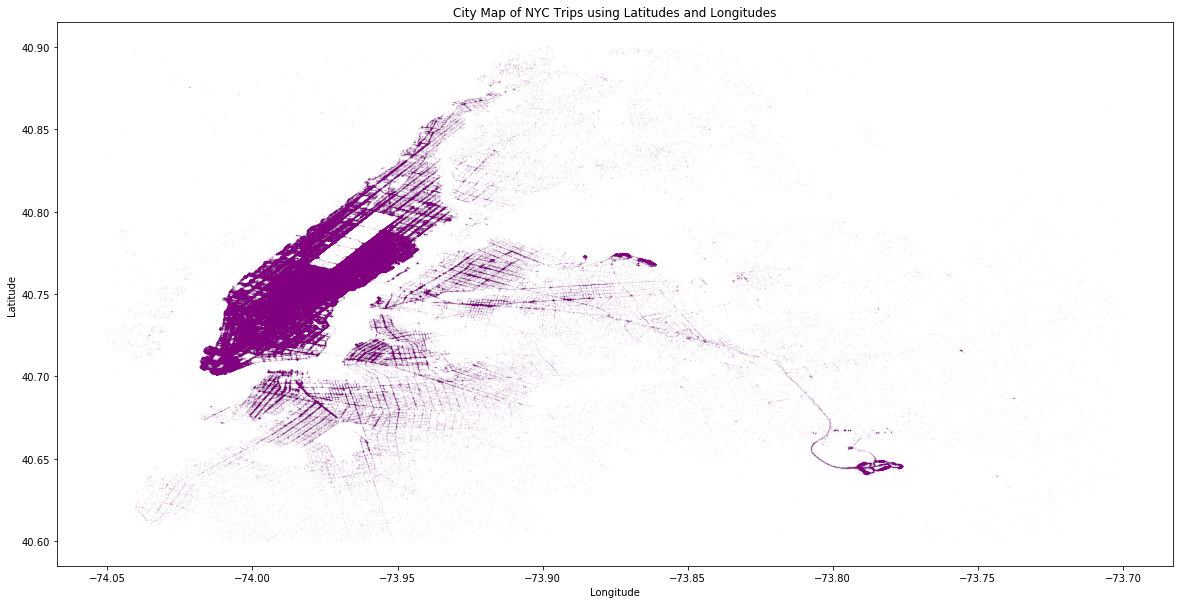

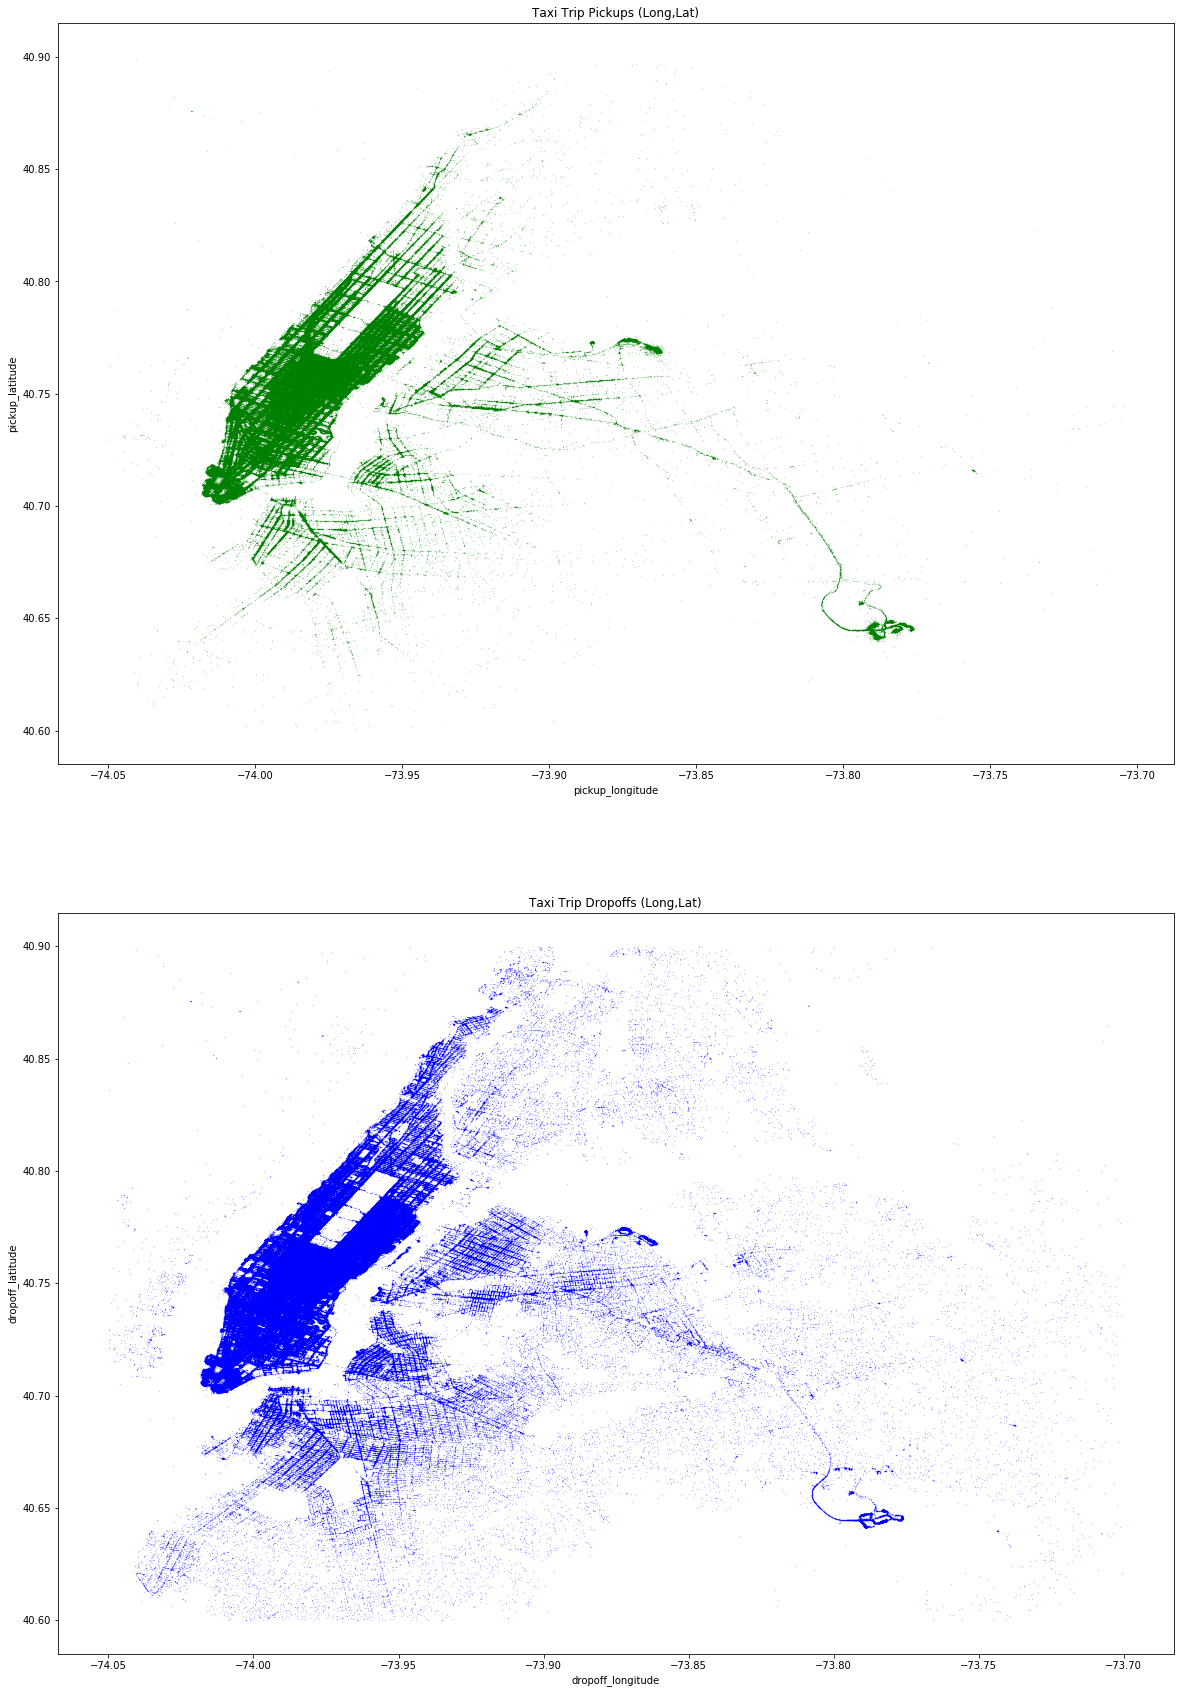

In [21]:
plt.figure(figsize=(20,10))

train_coord = train.loc[(train.pickup_latitude > 40.6) & (train.pickup_latitude < 40.9)]
train_coord = train_coord.loc[(train.dropoff_latitude > 40.6) & (train.dropoff_latitude < 40.9)]
train_coord = train_coord.loc[(train.pickup_longitude > -74.05) & (train.pickup_longitude < -73.7)]
train_coord = train_coord.loc[(train.dropoff_longitude > -74.05) & (train.dropoff_longitude < -73.7)]

# Combining Pickup and Dropoff values into a list for Latitudes and Longitudes 
longitudes = list(train_coord.pickup_longitude) + list(train_coord.dropoff_longitude)
latitudes = list(train_coord.pickup_latitude) + list(train_coord.dropoff_latitude)

# Plot the latitude and Longitude values
plt.plot(longitudes, latitudes, '.', alpha=0.6, markersize=0.05, color='purple')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('City Map of NYC Trips using Latitudes and Longitudes')
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharey=True, figsize=(20,30))

train_coord.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude', color='green', s=0.02, alpha=0.6, subplots=True, ax=ax1)
train_coord.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude', color='blue', s=0.02, alpha=0.6, subplots=True, ax=ax2)
ax1.set_title('Taxi Trip Pickups (Long,Lat)')
ax2.set_title('Taxi Trip Dropoffs (Long,Lat)')

from IPython.display import Image
# Load and Display Image of NYC on map
#Image('./nyc_img.png') #Sorry, deleted the file.

<hr style="height: 1.0px;"/>

### Accuracy Checker - Connor

In order to determine how accurate the model is, the user will have to compare the the predicted results against the actual results. There are two approaches that can be taken, an exact comparison where only a '1' will be returned if the predicted durations is exactly the same, or an approximate duration where a percentage-out is allowed

In [12]:
def accuracy(actual, predicted, percentage=0):
    #The two lists need to be of the same size
    if(len(actual) != len(predicted)):
        return np.nan
    
    if(percentage == 0):
        temp = actual == predicted
    else:
        temp = ((actual * (1 - percentage)) <= predicted) & (predicted <= (actual * (1 + percentage)))
    
    return (sum(temp)/len(actual)*100)    

In [14]:
def plotAccuracy(actual, pred):
    plt.figure(figsize=(10,10))
    plt.title("Actual vs Predicted")
    plt.scatter(actual, pred, color="r", alpha=0.1, label="Predicted")
    plt.scatter(actual, actual, color="g", label="Actual")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.legend()
    plt.show()

<hr style="height: 1.0px;"/>

### Plot actual vs Predicted - Tze-yi

When the predict is correct, the dot will be blue. If the predict is not same as the actual value, the actual value's dot will be red and the predict value's dot will be green.

In [31]:
def actvspred(actual, predicted):
    
    if(len(actual) != len(predicted)):
        print('error')
    else:    
        same_list = []
        same_list_y = []
        
        diffact_list = []
        diffpred_list = []
        diff_list_y = []
        
        for i in range(len(actual)):
            if actual[i]==predicted[i]:
                same_list.append(actual[i])
                same_list_y.append(i)
            else:
                diffact_list.append(actual[i])
                diffpred_list.append(predicted[i])
                diff_list_y.append(i)
           
        plt.figure(figsize=(10,8))
        plt.title('Actual vs Predicted') 
        plt.scatter(same_list_y,same_list, c='b', label = 'predicted correct')
        plt.scatter(diff_list_y, diffact_list, c='r', label = 'actual value')
        plt.scatter(diff_list_y, diffpred_list, c='g', label = 'predicted value')
        plt.legend()
        plt.show()
        
    


<hr style="height: 1.0px;"/>

### Principal component analysis (PCA) - Tze-yi

To plot the PCA will need the target of the data, taking the trip_duration as the target. 

In [9]:
def tfto10(state):
    if state == True:
        return 1 
    else:
        return 0
    
def YNto10(state):
    if state == 'N':
        return 0 
    else:
        return 1


In [17]:
temp = train.copy()
temp['workTime'] = temp.apply(lambda row : tfto10(row['workTime'],), axis=1)
temp['lateNight'] = temp.apply(lambda row : tfto10(row['lateNight'],), axis=1)
temp['weekday'] = temp.apply(lambda row : tfto10(row['weekday'],), axis=1)
temp['store_and_fwd_flag'] = temp.apply(lambda row : YNto10(row['store_and_fwd_flag'],), axis=1)
temp = temp.drop('dropoff_datetime', axis = 1)
temp_target = temp['trip_duration']


<Figure size 432x288 with 0 Axes>

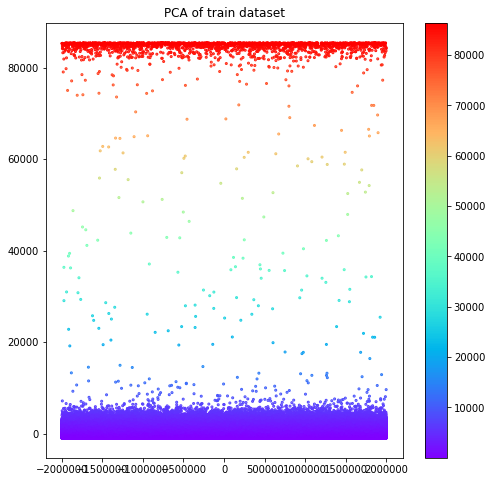

In [18]:

pca = PCA(n_components=2)
X_r = pca.fit(temp).transform(temp)

plt.figure()
lw = 2

plt.figure(figsize=(8,8))
sc = plt.scatter(X_r[:, 0], X_r[:,1], c=temp_target, alpha=1, lw=lw,cmap="rainbow", s=1 )#c=None
plt.colorbar(sc)
plt.title('PCA of train dataset')
plt.show()


<hr style="height: 1.0px;"/>

### Data Cleaning and Feature Reduction - Connor

Date: 19/04/2019

In [16]:
#Conerting store_and_fwd_flag to boolean values

def flagToBoolean(row):
    if(row['store_and_fwd_flag'] == "N"):
        return 0
    elif(row['store_and_fwd_flag'] == "Y"):
        return 1
    else:
        return row['store_and_fwd_flag']

train['store_and_fwd_flag'] = train.apply (lambda x: flagToBoolean(x), axis=1)

In [17]:
#Data Cleaning and feature reduction
print("Train Shape: ", train.head(5).shape)
print("Test Shape: ", test.head(5).shape)
print("\n") #Carriage return

#For some reason the test data contains two less columns
print("Missing Columns: ", set(list(train)) - set(list(test)))

#Can't remove trip_duration as it is needed in training process but no
# need to keep 'dropoff_datatime'
print("Dropping 'dropoff_datetime'")

if 'dropoff_datetime' in train.columns:
    train = train.drop('dropoff_datetime',1)

Train Shape:  (5, 18)
Test Shape:  (5, 9)


Missing Columns:  {'workTime', 'pickup_Day', 'pickup_Year', 'weekday', 'dropoff_datetime', 'pickup_Month', 'pickup_Minute', 'pickup_Hour', 'trip_duration', 'lateNight'}
Dropping 'dropoff_datetime'


<hr style="height: 1.0px;"/>

### Training/Testing split - Tze-yi

* add words *

In [18]:
# train split to 75/25

y = train['trip_duration']
x_train, x_test, y_train, y_test = train_test_split(train, y, test_size=0.25)

print('Taining total set size:',train.shape[0])
print('Training set size:', x_train.shape[0])
print('Test set size:', x_test.shape[0])

X_train, X_test = train_test_split(train, test_size=0.25)

Taining total set size: 1450657
Training set size: 1087992
Test set size: 362665


<br />
<hr style="height: 1.0px;"/>

# Machine Learning

Using a variety of different Machine Learning techniques and data sources, a comparative analysis into the effectiveness and reliability of the methods will be conducted. These methods include:
 * eXtreme Gradient Boosting (XGBoosting)
 * Ada Boost
 * Random Forest
 * Neural Networks
 * K-Nearest Neighbor (KNN)
 * CAITLIN
 
In order to gain better results, a wide range of external sources are also used. For example:
 * XGBoosting will be incorporated with:
  * 2016 weather forecast
  * 2016 hourly weather forecast (for comparative reaons)  
  * OSRM
  * Storm Warnings


Finally, after each Machine Learning process has been trained, the features of the most importance will be determined. This will help identify the significant features for a given model.


<hr style="height: 1.0px;"/>

### XGBoost with variational datasources - Connor

In order to determine which dataset has the largest effect on the accuracy of the model, $5$ models will be created. After each model has been trained for $n$ iterations, the accuracy will be calculated from the testing dataset (25% of the training dataset). The base model will include just the given training data and no external data sources, this will give a good bench mark to work on. All other models will include one or more external sources.


Models:
 * Default (given data)
 * 2016 daily weather
 * 2016 hourly weather
 * OSRM
 * Storm Warning
 
Should time permit it, a combination of the above models will be used.

<b>Why XGBoost?</b><br />
words...

<b>Parameters:</b><br />
XGBoost has lots of hyper-parameters that can be fine tuned. As such, finding the optimum combination can take days of running. As a result, minimal parameter tuning will be used. For a guide on parameter tuning with XGBoost, look at [analyticsvidhya](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/).

NOTES:

* Storm Warning:
 * This info can reduce the RMSLE in my experiments, you can refer the sample code to add the info into datasets: https://www.kaggle.com/c/nyc-taxi-trip-duration/discussion/38591#216546
* Can we train using the lon and lat? Thinking about assigning areas rather than two seemingly random numbers?
* 'store_and_fwd_flag' caused some problems, not sure if even needed

<br /><br />
<hr />

XGBoost - Model 1

This first model uses the information that Kaggle provided and no external sources.

In [27]:
def scoringSystem(model, train, target):
    predicted = model.predict(train) 
    return np.sqrt(mean_squared_log_error(target, predicted))
    
def plotModel(model, X, y, validation=False):
    pred = model.predict(X)
    
    if(validation):
        print("Validation  RMSE:", round(np.sqrt(mean_squared_error(y, pred)),6), 
              " || Accuracy within 5%: ", accuracy(y, pred, 0.05))
    else:
         print("Train  RMSE:", round(np.sqrt(mean_squared_error(y, pred)),6), 
              " || Accuracy within 5%: ", accuracy(y, pred, 0.05))
        
    plotAccuracy(y, pred)
    
def splittingKeyFeatures(model, features):
    #imp_vals = model.get_fscore()
    imp_vals = model.get_booster().get_fscore() #Now using regression
    return {features[i]:float(imp_vals.get('f'+str(i),0.)) for i in range(len(features))}

def plotKeyModelFeature(model, feature_names, returnValue=False):
    D = splittingKeyFeatures(model,feature_names)
    D = collections.OrderedDict(sorted(D.items(), key=lambda kv: kv[1]))

    featureValues = list(D.values())
    featureArray = np.arange(len(D))

    fig =  plt.figure(figsize = (15,10))
    plt.barh(featureArray, featureValues)
    plt.yticks(featureArray, list(D.keys()))

    returnValues = []
    
    #Adding the numerical value to the end of the plot
    for i, v in enumerate(featureValues):
        plt.text(v + 3.5, i + .0, str(round(v)), color='black', fontweight='bold')        
        returnValues.append(v)
        
    plt.show()
    
    if(returnValue):
        return returnValues


In [28]:
def modelTrainer(data, target, feature_names, save=False, fileName=None, params=None, \
                 plotResults=False, validationSplit=0.2):    
    #Splitting the data into training and validation
    xgb_Xtrain, xgb_Xval, xgb_Ytrain, xgb_Yval = train_test_split(data, target, test_size=validationSplit)
    
    if(params == None):
        print("Error, please input parameters")
        return np.nan
        
    xgbModel = xgb.XGBRegressor(**params)
    gridSearchParams = ShuffleSplit(n_splits=4, test_size=0.1, random_state=0)
    cross_val_score(xgbModel, xgb_Xtrain, np.ravel(xgb_Ytrain), cv=gridSearchParams, scoring=scoringSystem)
    
    #Fitting the training data to the model
    xgbModel.fit(xgb_Xtrain, xgb_Ytrain)
    
    if(save):
        if(fileName != None):
            pickle.dump(feature_names, open("savedModels/"+fileName+"_features.pickle.dat", "wb"))
            pickle.dump(xgbModel, open("savedModels/"+fileName+".pickle.dat", "wb"))
            
    if(plotResults):      
        plotModel(xgbModel, xgb_Xtrain, xgb_Ytrain, validation=False)
        plotModel(xgbModel, xgb_Xval, xgb_Yval, validation=True)
        plotKeyModelFeature(xgbModel, feature_names)
        
                
    return xgbModel

#### Attempted parameters

In [29]:
#----------------------
#Currently used param

params = {'min_child_weight': 100, 'eta': 0.1, 'colsample_bytree': 0.7, 'max_depth': 15,
            'subsample': 0.8, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
            'eval_metric': 'rmse', 'objective': 'reg:linear'}


#----------------------



params1 = {'min_child_weight': 28, 'eta': 0.17, 'colsample_bytree': 0.54, 'max_depth': 16,
            'subsample': 0.95, 'lambda': 1, 'nthread': 8, 'booster' : 'gbtree', 'silent': 1,
            'eval_metric': 'rmse', 'objective': 'reg:linear'}

params2 = {'colsample_bytee': 0.7, 'subsample':0.7, 'booster': 'gbtree', 'max_depth': 5, 'eval_metric': 'rmse', 
            'objective': 'reg:linear', 'seed': 4321}

params3 = {'min_child_weight': 100, 'eta': 0.1, 'colsample_bytree': 0.7, 'max_depth': 15,
            'subsample': 0.8, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
            'eval_metric': 'rmse', 'objective': 'reg:linear'}

#--------------------

params4 = {'min_child_weight': 5, 'eta': 0.05,  'max_depth': 10,
            'subsample': 0.8, 'booster' : 'gbtree', 'silent': 1,'gamma':0.2,
            'eval_metric': 'rmse', 'objective': 'reg:linear','colsample_bytree':0.8}

#--------------------

params5 = {'minchildweight': 1, 'eta': 0.05, 'colsamplebytree': 0.3, 'maxdepth': 4, 
           'subsample': 0.5, 'lambda': 40, 'alpha': 0.0, 'nthread': -1, 'booster' : 'gbtree', 
           'silent': 1, 'evalmetric': 'rmse', 'objective': 'reg:linear', 'gamma' : 0}

#70.65727841773264

#--------------------

params6 = {'min_child_weight': 1, 'eta': 0.166, 'colsample_bytree': 0.4, 'max_depth': 9,
            'subsample': 1.0, 'lambda': 57.93,'booster': 'gbtree', 'gamma': 0.5,
            'silent': 1, 'eval_metric': 'rmse', 'objective': 'reg:linear'}
#70.51756271408574

#--------------------

params7 = {'n_estimators':300, 'learning_rate':0.08, 'gamma':0,
          'subsample':0.75, 'colsample_bytree':1, 'max_depth':7,
            'min_child_weight':4, 'silent':1, 'n_jobs':-1}

#71.11014941105394

params8 = {'n_estimators': 100, 'seed':0, 'colsample_bytree': 1, 
             'max_depth': 7, 'min_child_weight': 1,'learning_rate': 0.1, 'subsample': 0.8}

### 73.59565392577773






#QUICK MODEL
params9 = {'n_estimators': 1, 'seed':0, 'colsample_bytree': 1, 
             'max_depth': 2, 'min_child_weight': 1,'learning_rate': 0.1, 'subsample': 0.8}


/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Train  RMSE: 5.422421  || Accuracy within 5%:  0.0


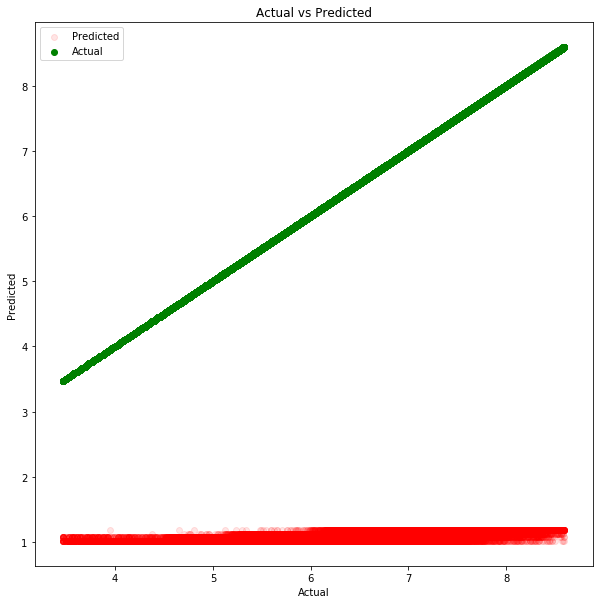

Validation  RMSE: 5.423296  || Accuracy within 5%:  0.0


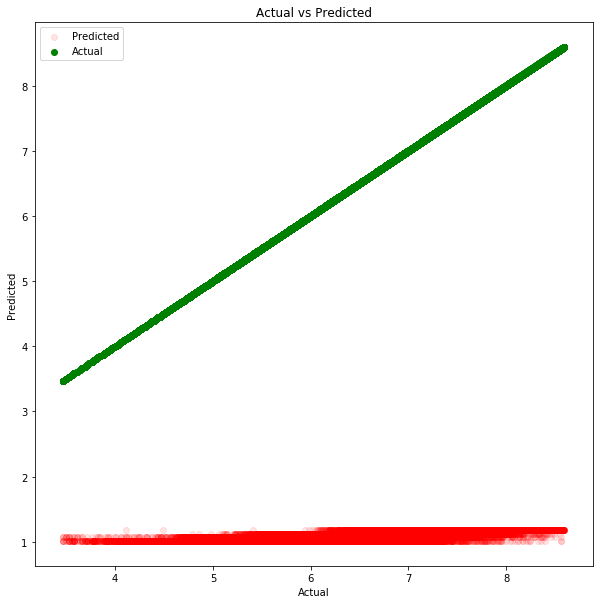

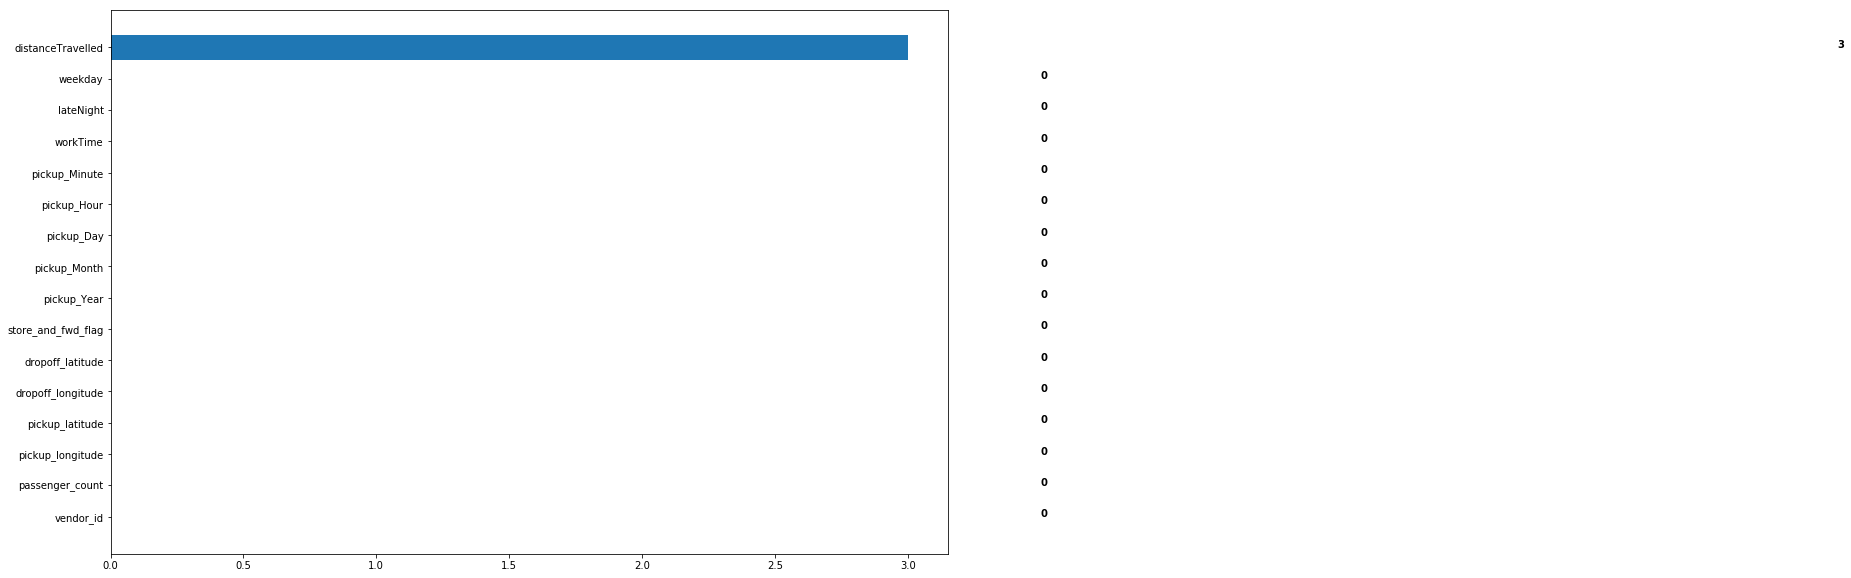

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=1, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.8)

In [158]:
feature_names = X_train.columns.tolist()

feature_names.remove('id')
feature_names.remove('trip_duration')

target = np.log(X_train['trip_duration'] + 1)
features = X_train[feature_names].values

#Save location
fileName = "XGB_model_1"

modelTrainer(features, target, feature_names=feature_names, save=True, \
             fileName=fileName, params=params, plotResults=True)

#### XGBoost - Model 2 

For this model, the OSRM data will be incoroprated. This should hopefully improve the RMSE score.

Model 1: train-rmse:0.332403	valid-rmse:0.401927

In [30]:
def getOSRMdataset():
    #Since the OSRM dataset is huge, it was split into three spreadsheets. As a result they need to be combined.
    fastestRoute = pd.concat((fastest_route_train_1,fastest_route_train_2, fastest_route_train_3))

    #Dropping unnecessary
    fastestRoute = fastestRoute.drop(['starting_street','end_street','street_for_each_step','distance_per_step',
                                      'travel_time_per_step','step_maneuvers','step_location_list'],1)
    
    return fastestRoute

#### Interesting remark

In America you are allowed to turn <b>right</b> at a traffic light. <br />

"At many intersections in New York State, governed by traffic lights, you may make a right turn when the light is red." - [safeny](www.safeny.ny.gov/roadrule.htm)

In an episode of MythBusters, they proved it was quicker to always turn right as opposed to waiting to turn left at a traffic light. It would be interesting to see if this trait will be the same for the area of Manhatten

In [61]:
def numLeftTurns(row):
    return(row.count('left'))

def numRightTurns(row):
    return(row.count('right'))

def getReducedOSRMdataset(dataset=None):
    if((dataset == "Train") or (dataset == None)):
        OSRMtemp = X_train.copy()
    else:
        OSRMtemp = X_test.copy()
        
    fastestRoute = getOSRMdataset()
    OSRMtemp = OSRMtemp.dropna()

    fastestRoute['leftTurns'] = fastestRoute['step_direction'].apply (lambda x: numLeftTurns(x))
    fastestRoute['rightTurns'] = fastestRoute['step_direction'].apply (lambda x: numRightTurns(x))
    fastestRoute['id'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
    fastestRoute = fastestRoute.drop('step_direction',1)
    
    #mergedTemp = pd.merge(temp, fastestRoute, left_on='id', right_on='id', how='left')
    OSRMtemp = OSRMtemp.join(fastestRoute.set_index('id'), on = 'id')
    OSRMtemp = OSRMtemp.dropna() 
    
    feature_names = OSRMtemp.columns.tolist()
    
    return OSRMtemp, feature_names

In [62]:
#Change MergedTemp to train when model is working

#Training the second model with OSRM data

OSRMtemp, feature_names = getReducedOSRMdataset()

feature_names.remove('id')
feature_names.remove('trip_duration')

target = np.log(OSRMtemp['trip_duration'] + 1)
features = OSRMtemp[feature_names].values

#Save location
#fileName = "savedModels/XGB_model_2.pickle.dat"
fileName = "XGB_model_2"

#data, target, save=False, fileName=None, params=None, validationSplit=0.2):
xgbModel_2 = modelTrainer(features, target, feature_names=feature_names, save=True, \
                          fileName=fileName, params=params, plotResults=True)


(1079550, 23)


#### XGBoost - Model 3

It is hypothesised that the weather plays a key role in the speed at which a taxi can travelled. As a result New York cities 2016 weather forecast was downloaded and mapped to the each day of the training data.

In [32]:
def NYCweatherDataset(dataset=None):
    NYCtemp = NYCweather.copy()

    #Step 1) Break down time data
    #Current 'pickup_datetime' format: 2016-03-14 17:24:55 OR YYYY-MM-DD HH:MM:SS
    #Varibles are callde 'pickup_***' to allow for concatenation later on.
    NYCtemp[['Date','Time']] = NYCtemp.Time.str.split(" ",expand=True,)
    NYCtemp[['pickup_Year','pickup_Month','pickup_Day']] = NYCtemp.Date.str.split("-",expand=True,)
    NYCtemp[['pickup_Hour','pickup_Minute','pickup_Second']] = NYCtemp.Time.str.split(":",expand=True,)

    #Dropping columns
    NYCtemp = NYCtemp.drop('Time',1)
    NYCtemp = NYCtemp.drop('Date',1)
    NYCtemp = NYCtemp.drop('pickup_Minute',1)
    NYCtemp = NYCtemp.drop('pickup_Second',1)

    #Step 2) Drop columns that contain NaN
    NYCtemp = NYCtemp.dropna(axis='columns')

    #Step 3) Get dummy variables

    #Cols = ['Fog', 'Fog\n\t,\nRain', 'Fog\n\t,\nSnow', 'None', 'Rain', 'Snow']
    eventDummy = pd.get_dummies(NYCtemp['Events'])

    #Combing cols that are the same
    eventDummy['eventFog'] = eventDummy['Fog'] + eventDummy['Fog\n\t,\nRain'] + eventDummy['Fog\n\t,\nSnow']
    eventDummy['eventRain'] = eventDummy['Rain'] + eventDummy['Fog\n\t,\nRain']
    eventDummy['eventSnow'] = eventDummy['Snow'] + eventDummy['Fog\n\t,\nSnow']
    eventDummy['eventNone'] = eventDummy['None']

    #NYCtemp = NYCtemp.drop('Time',1)
    eventDummy = eventDummy.drop('Fog\n\t,\nRain',1)
    eventDummy = eventDummy.drop('Fog\n\t,\nSnow',1)
    eventDummy = eventDummy.drop('Fog',1)
    eventDummy = eventDummy.drop('Rain',1)
    eventDummy = eventDummy.drop('Snow',1)
    eventDummy = eventDummy.drop('None',1)

    #Dropping the events column and adding new dummy cols
    NYCtemp = NYCtemp.drop('Events',1)
    NYCtemp = pd.concat([NYCtemp, eventDummy], axis=1)





    #Getting dummy varibles for 'Wind Dir'
    #Cols = ['Calm', 'ENE', 'ESE', 'East', 'NE', 'NNE', 'NNW', 'NW', 'North', 'SE',
    #        'SSE', 'SSW', 'SW', 'South', 'Variable', 'WNW', 'WSW', 'West']
    windDirDummy = pd.get_dummies(NYCtemp['Wind Dir'])

    #Dropping 'wind direction'
    NYCtemp = NYCtemp.drop('Wind Dir',1)
    NYCtemp = pd.concat([NYCtemp, windDirDummy], axis=1)




    #Getting dummy variable for 'Conditions'
    #Cols = ['Clear', 'Fog', 'Haze', 'Heavy Rain', 'Heavy Snow',
    #       'Light Freezing Fog', 'Light Freezing Rain', 'Light Rain', 'Light Snow',
    #       'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'Rain',
    #       'Scattered Clouds', 'Snow', 'Unknown']
    conditionsDummy = pd.get_dummies(NYCtemp['Conditions'])

    #Dropping 'Conditions'
    NYCtemp = NYCtemp.drop('Conditions',1)
    NYCtemp = pd.concat([NYCtemp, conditionsDummy], axis=1)


    #Step 4) Attemp this data to the standard dataset (without OSRM) based on Year|Month|Day|Hour

    #Making a copy so if a mistake is made can easily go back.
    #Cols = ['Temp.', 'Humidity', 'Dew Point', 'Wind Speed', 'Gust Speed', 'Precip',
    #       'pickup_Year', 'pickup_Month', 'pickup_Day', 'pickup_Hour', 'Fog',
    #       'None', 'Rain', 'Snow', 'Calm', 'ENE', 'ESE', 'East', 'NE', 'NNE',
    #       'NNW', 'NW', 'North', 'SE', 'SSE', 'SSW', 'SW', 'South', 'Variable',
    #       'WNW', 'WSW', 'West', 'Clear', 'Fog', 'Haze', 'Heavy Rain',
    #       'Heavy Snow', 'Light Freezing Fog', 'Light Freezing Rain', 'Light Rain',
    #       'Light Snow', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy', 'Rain',
    #       'Scattered Clouds', 'Snow', 'Unknown']


    #TempCols = ['id', 'vendor_id', 'passenger_count', 'pickup_longitude',
    #       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
    #       'store_and_fwd_flag', 'trip_duration', 'pickup_Year', 'pickup_Month',
    #       'pickup_Day', 'pickup_Hour', 'pickup_Minute', 'workTime', 'lateNight',
    #       'weekday', 'distanceTravelled']
    
    if((dataset == "Train") or (dataset == None)):    
        weatherTemp = X_train.copy()
    else:
        weatherTemp = X_test.copy()
        
    weatherTemp = pd.merge(weatherTemp, NYCtemp, on = ['pickup_Year', 'pickup_Month', 'pickup_Day', 'pickup_Hour'], how = 'left')

    feature_names = weatherTemp.columns.tolist()
    
    return weatherTemp, feature_names

In [64]:
#Step 5) Create model

#Training the second model with OSRM data
weatherTemp, feature_names = NYCweatherDataset()

feature_names.remove('id')
feature_names.remove('trip_duration')


target = np.log(weatherTemp['trip_duration'] + 1)
features = weatherTemp[feature_names].values

#Save location
fileName = "XGB_model_3"

#data, target, save=False, fileName=None, params=None, validationSplit=0.2):
xgbModel_3 = modelTrainer(features, target, feature_names=feature_names, save=True, \
                          fileName=fileName, params=params, plotResults=True)

        id  vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0  1099102          1                1        -73.985085        40.769409   
1  3158817          1                1        -74.001869        40.740513   
2  3567403          2                6        -73.988007        40.748661   
3  3111664          2                1        -73.986603        40.751049   
4  3832625          2                6        -73.788139        40.641994   

   dropoff_longitude  dropoff_latitude  store_and_fwd_flag  trip_duration  \
0         -73.981483         40.783943                   0            578   
1         -73.979324         40.752655                   0            695   
2         -74.002518         40.755268                   0            575   
3         -73.871239         40.774090                   0           1935   
4         -73.989883         40.754986                   0           4215   

  pickup_Year  ... Light Freezing Rain Light Rain Light Snow Mostly Cloudy

#### Model 4 - Combined features

Combining the standard information with the most important features from model 2 (OSRM) and model 3 (Weather).
First an exploration into the key features of each model will be performed to determine a cut off point.
The the features will be combined and the final model will be created.

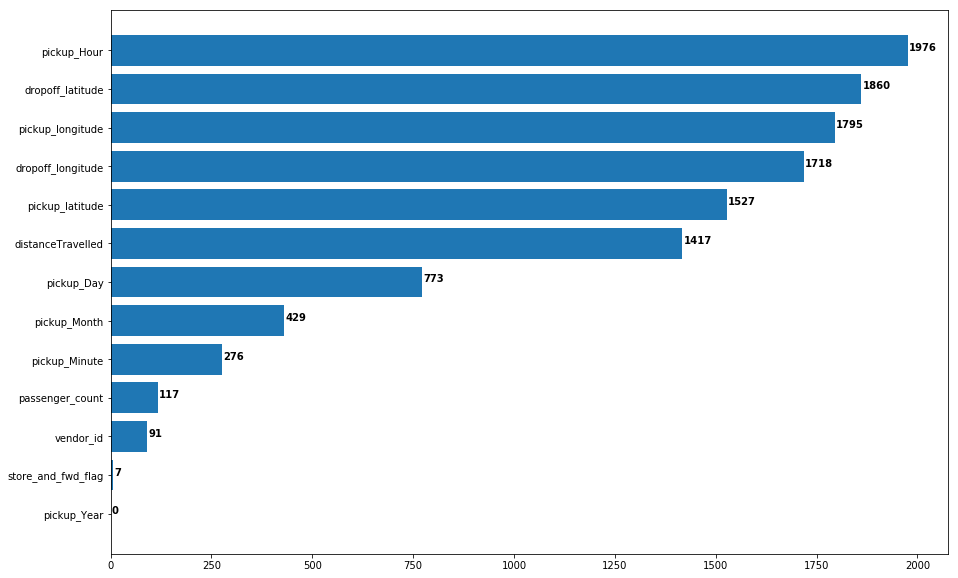

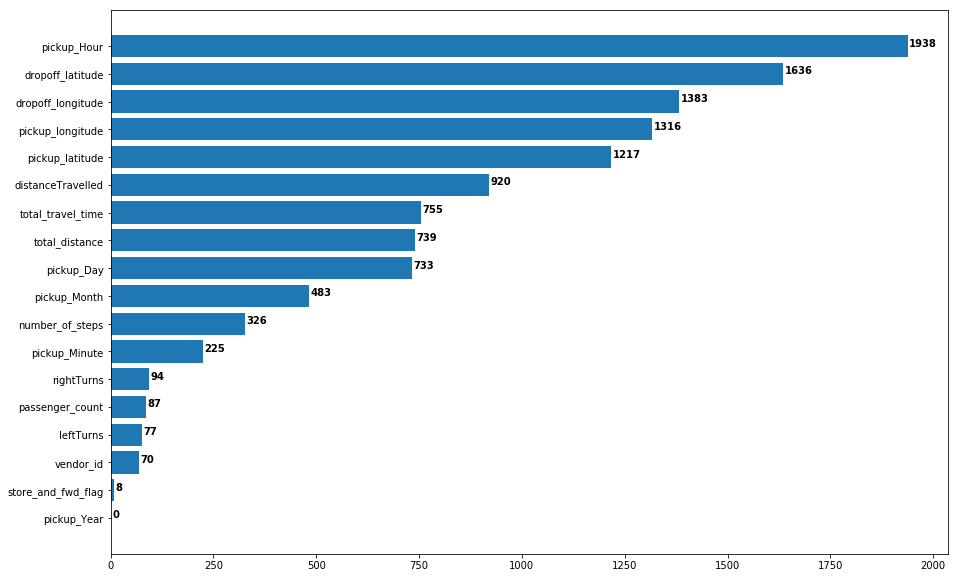

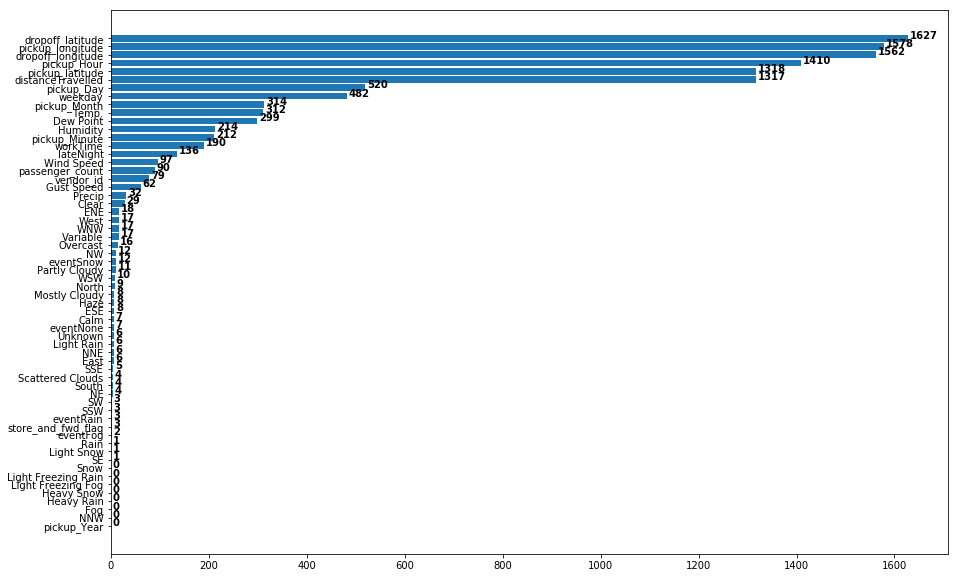

In [87]:
#Default model: 
model_1 = pickle.load(open("savedModels/XGB_model_1.pickle.dat", "rb"))
model_1_Features = pickle.load(open("savedModels/XGB_model_1_features.pickle.dat", "rb"))

#ORSM model:
model_2 = pickle.load(open("savedModels/XGB_model_2.pickle.dat", "rb"))
model_2_Features = pickle.load(open("savedModels/XGB_model_2_features.pickle.dat", "rb"))

model_3 = pickle.load(open("savedModels/XGB_model_3.pickle.dat", "rb"))
model_3_Features = pickle.load(open("savedModels/XGB_model_3_features.pickle.dat", "rb"))

plotKeyModelFeature(model_1,model_1_Features)
plotKeyModelFeature(model_2,model_2_Features)
model3Features = plotKeyModelFeature(model_3,model_3_Features, returnValue=True)

#### Removing unneccserary features from all three models

In [88]:
#Model one
#store_and_fwd_flag and pickup_Year are not adding to the model
featureToDropModel1 = ['store_and_fwd_flag','pickup_Year']

#Dropping the selected features
for featureName in featureToDropModel1:
    model_1_Features.remove(featureName)

#Model two
#store_and_fwd_flag and pickup_Year are not adding to the model - Same as model one
featureToDropModel2 = ['store_and_fwd_flag','pickup_Year']

#Dropping the selected features
for featureName in featureToDropModel2:
    model_2_Features.remove(featureName)

#Model three
#Going to drop all features that have score less than zero.
#Surprising to see that 'snow' had little effect.

#Features that will be dropped from model three
featureToDropModel3 = []

#The value of 'calm' from model 3
dropValue = 10

for feature, value in zip(model_3_Features, model3Features):
    if(value > dropValue):
        featureToDropModel3.append(feature)            
        
#Dropping the selected features
for featureName in featureToDropModel3:
    model_3_Features.remove(featureName)

/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Train  RMSE: 5.422972  || Accuracy within 5%:  0.0


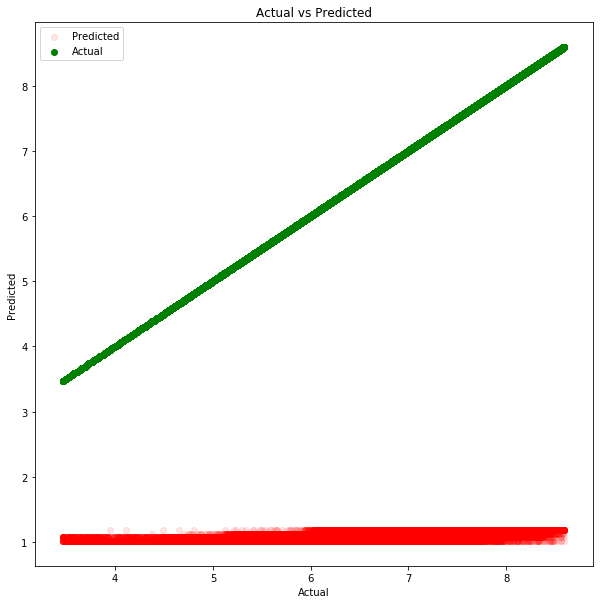

Validation  RMSE: 5.421557  || Accuracy within 5%:  0.0


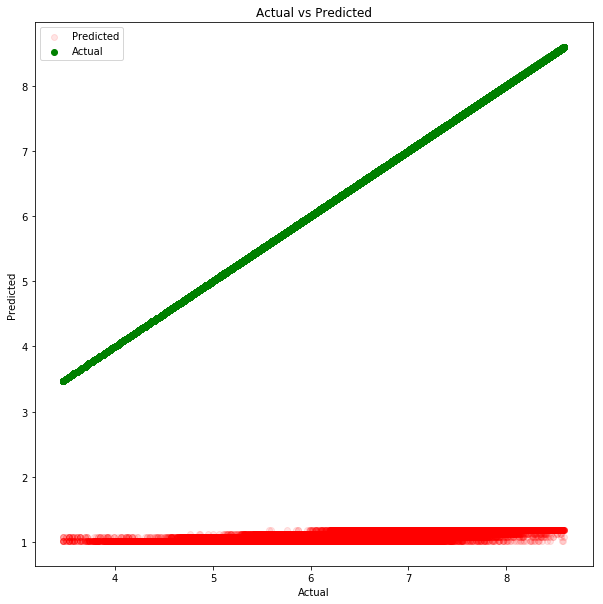

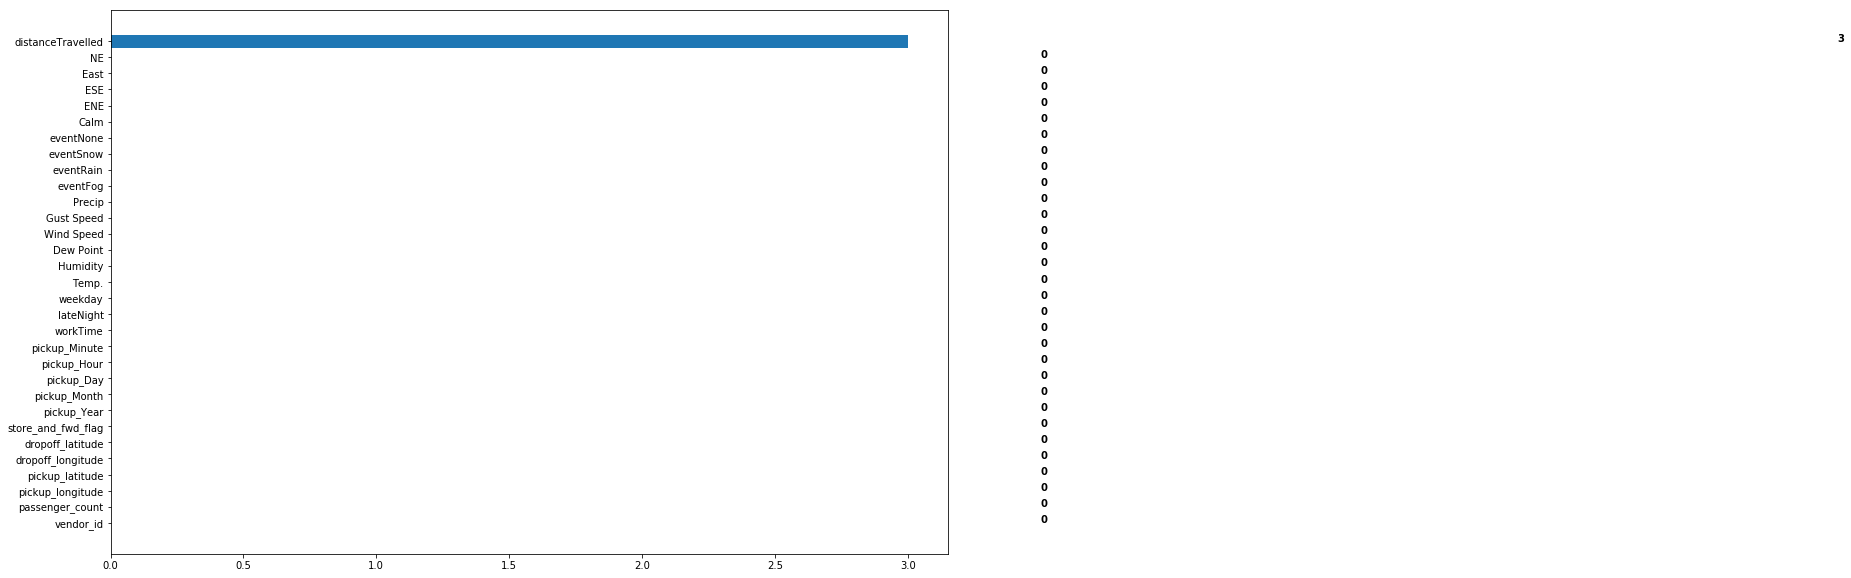

In [89]:
#Running new model three to see the effects of dropping a large portion of features.
#Training the second model with OSRM data

target = np.log(weatherTemp['trip_duration'] + 1)
features = weatherTemp[model_3_Features].values

#Save location
fileName = "XGB_model_3_reduced"

#data, target, save=False, fileName=None, params=None, validationSplit=0.2):
xgbModel_3_reduced = modelTrainer(features, target, feature_names=model_3_Features, save=True, \
                          fileName=fileName, params=params, plotResults=True)

### No really improvemovent was determined however the reduced dataset will be used

Combining all three datasets into one and create the fourth and final model

In [67]:
def createFinalDataset(dataset=None):
    #train => default dataset
    #OSRMtemp => OSRM dataset
    #weatherTemp => weather dataset
    
    weatherDatset, _ = NYCweatherDataset(dataset)
    finalDataset, _ = getReducedOSRMdataset(dataset)
    
    #Going to append the weather data to OSRM but first need to remove duplicate cols
    #Cols to drop
    dropCols = ['vendor_id', 'passenger_count', 'pickup_longitude',
               'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
               'store_and_fwd_flag', 'trip_duration', 'pickup_Year', 'pickup_Month',
               'pickup_Day', 'pickup_Hour', 'pickup_Minute', 'workTime', 'lateNight',
               'weekday', 'distanceTravelled']

    
    #Dropping the selected features -> Note the id is still present
    weatherDatset = weatherDatset.drop(dropCols, 1)
    
    finalDataset = finalDataset.join(weatherDatset.set_index('id'), on = 'id')
    finalDataset = finalDataset.dropna()
    
    feature_names = finalDataset.columns.tolist()
    
    return finalDataset, feature_names

/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Train  RMSE: 5.423354  || Accuracy within 5%:  0.0


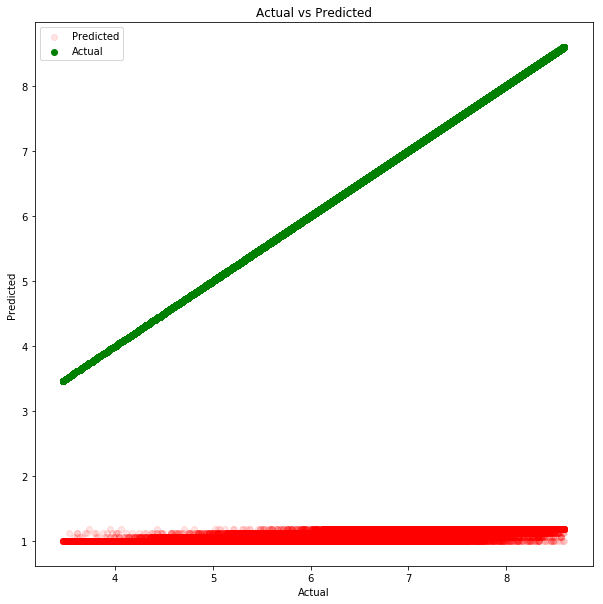

Validation  RMSE: 5.422328  || Accuracy within 5%:  0.0


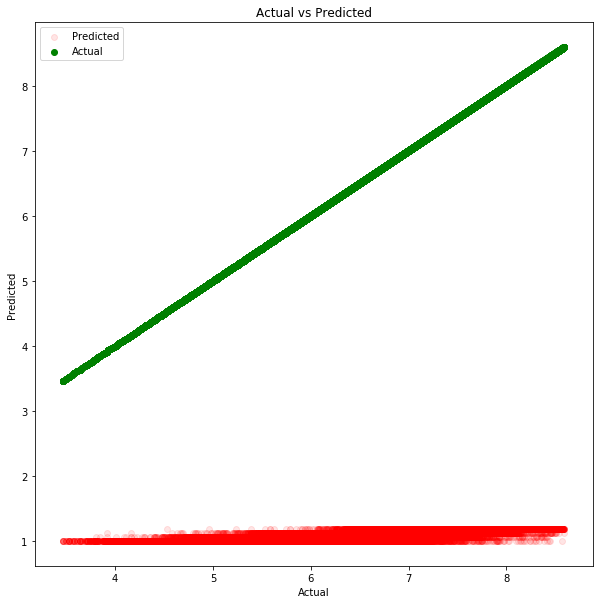

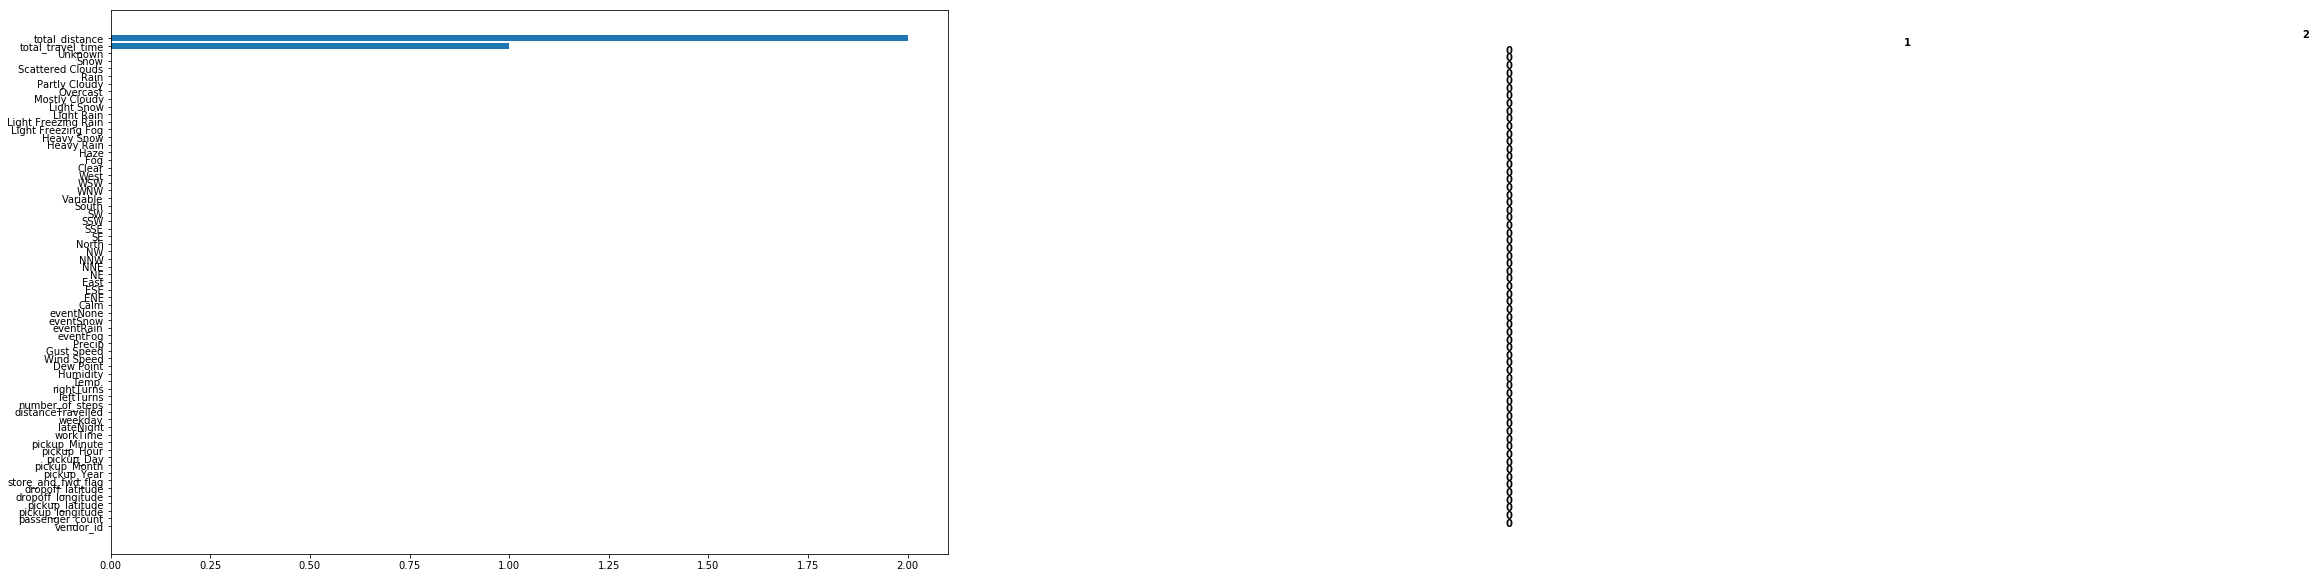

In [153]:
# Training final model 

finalDataset, feature_names = createFinalDataset()

feature_names.remove('id')
feature_names.remove('trip_duration')


target = np.log(finalDataset['trip_duration'] + 1)
features = finalDataset[feature_names].values

#Save location
fileName = "XGB_model_4"

#data, target, save=False, fileName=None, params=None, validationSplit=0.2):
xgbModel_4 = modelTrainer(features, target, feature_names=feature_names, save=True, \
                          fileName=fileName, params=params, plotResults=True)

<hr style="height: 1.0px;"/>

### kNN - Runyu

* words *

In [5]:
#CODE
#Importing
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import math
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier as knn

from sklearn.model_selection import train_test_split

import matplotlib as mpl
#Creating zipFile instances
training_zip = zipfile.ZipFile('train.zip')
testing_zip = zipfile.ZipFile('test.zip')
weather_zip = zipfile.ZipFile('2016-weather.zip')
weather_hourly_zip = zipfile.ZipFile('2016-hourlyWeather.zip')
fastest_route_test_zip = zipfile.ZipFile('fastest_routes_test.zip')
fastest_route_train_1_zip = zipfile.ZipFile('fastest_routes_train_part_1.zip')
fastest_route_train_2_zip = zipfile.ZipFile('fastest_routes_train_part_2_new.zip')
fastest_route_train_3_zip = zipfile.ZipFile('fastest_routes_train_part_3_new.zip')
stormWarning_zip = zipfile.ZipFile('NY_Storm_Events_2016.zip')

#Reading CSV file from zipFile instance
train = pd.read_csv(training_zip.open('train.csv'))
test = pd.read_csv(testing_zip.open('test.csv'))
weather = pd.read_csv(weather_zip.open('weather_data_nyc_centralpark_2016(1).csv'))
weather_hourly = pd.read_csv(weather_hourly_zip.open('Weather.csv'))
fastest_route_test = pd.read_csv(fastest_route_test_zip.open('fastest_routes_test.csv'))
fastest_route_train_1 = pd.read_csv(fastest_route_train_1_zip.open('fastest_routes_train_part_1.csv'))
fastest_route_train_2 = pd.read_csv(fastest_route_train_2_zip.open('fastest_routes_train_part_2_new.csv'))
fastest_route_train_3 = pd.read_csv(fastest_route_train_3_zip.open('fastest_routes_train_part_3_new.csv'))
stormWarning = pd.read_csv(stormWarning_zip.open('NY_Storm_Events_2016.csv'))
train = train.dropna()
### remove the text 'id' in the id column
train['id'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
train.sort_values(by='id').reset_index(drop=True)

from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(train, test_size=0.25)

train = train.drop('dropoff_datetime',1)
#Normalise time data

#Current 'pickup_datetime' format: 2016-03-14 17:24:55 OR YYYY-MM-DD HH:MM:SS
train[['Date','Time']] = train.pickup_datetime.str.split(" ",expand=True,)
train[['pickup_Year','pickup_Month','pickup_Day']] = train.Date.str.split("-",expand=True,)
train[['pickup_Hour','pickup_Minute','pickup_Second']] = train.Time.str.split(":",expand=True,)

#Dropping columns
train = train.drop('pickup_datetime',1)
train = train.drop('Date',1)
train = train.drop('Time',1)
train = train.drop('pickup_Second',1)
# Determining if working hours
startWork = "09"  # 9am
endWork = "17"  # 5pm

startLateNight = "22"  # 10pm
endLateNight = "06"  # 6am


def workTime(row):
    if ((row['pickup_Hour'] >= startWork) and (row['pickup_Hour'] <= endWork)):
        return True
    else:
        return False


def lateNight(row):
    if ((row['pickup_Hour'] >= startLateNight) or (row['pickup_Hour'] <= endLateNight)):
        return True
    else:
        return False


def weekday(row):
    df = pd.Timestamp(row['pickup_Year'] + "-" + row['pickup_Month'] + "-" + row['pickup_Day'])

    if df.dayofweek < 5:
        return True
    else:
        return False


# Determing if during workTime, lateNight and weekday
train['workTime'] = train.apply(lambda x: workTime(x), axis=1)
train['lateNight'] = train.apply(lambda x: lateNight(x), axis=1)
train['weekday'] = train.apply(lambda x: weekday(x), axis=1)
# Approximate radius of earth
R = 3961  # Miles


# R = 6373 #Km


def distance(row):
    lat1 = math.radians(row['pickup_latitude'])
    lon1 = math.radians(row['pickup_longitude'])

    lat2 = math.radians(row['dropoff_latitude'])
    lon2 = math.radians(row['dropoff_longitude'])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    temp = (R * c)
    if (temp <= 0):
        # No movement
        return np.nan
    return temp


train['distanceTravelled'] = train.apply(lambda x: distance(x), axis=1)

# Some of the fields had no movement and as a result are dropped
train.dropna()

def accuracy(actual, predicted, percentage = 0.3):
    #The two lists need to be of the same size
    if(len(actual) != len(predicted)):
        return np.nan
    
    if(percentage == 0):
        temp = actual == predicted
    else:
        temp = ((actual * (1 - percentage)) <= predicted) & (predicted <= (actual * (1 + percentage)))
    
    return (sum(temp)/len(actual)*100)    

#For some reason the test data contains two less columns
print("Missing Columns: ", set(list(train)) - set(list(test)))

#Can't remove trip_duration as it is needed in training process but no
# need to keep 'dropoff_datatime'
print("Dropping 'dropoff_datetime'")
#train = train.drop('dropoff_datetime',1)
print(train.columns)
print(test.columns)
split = len(train) * 0.75

train_train = train.loc[:split,:]
train_test = train.loc[split:,:]

print('Taining total set size:',train.shape[0])
print('Training set size:', train_train.shape[0])
print('Test set size:', train_test.shape[0])

X_train, X_test = train_test_split(train, test_size=0.25)

print('Taining total set size:',train.shape[0])
print('Training set size:', X_train.shape[0])
print('Test set size:', X_test.shape[0])
#Testing, drop where 'trip_duration' is zero
train = train[train.trip_duration != 0]

#Could consider taking the log?
y = np.log(train['trip_duration'])

#Some of the data cannot be used for training, for example, the trip duration as thats the output
Not_train_cols = ['id','trip_duration', 'distanceTravelled', 'dropoff_longitude',  'dropoff_latitude', 'store_and_fwd_flag']

dropped_train = train.drop([col for col in Not_train_cols if col in train], axis = 1)
feature_names = list(dropped_train.columns)

x_train, x_test, y_train, y_test = train_test_split(dropped_train[feature_names], y, test_size = 0.25)

#knn
knn1 = knn(n_neighbors = 5)

from sklearn.model_selection import GridSearchCV
import pickle
k_range = range(3, 5) 
weight_options = ['uniform', 'distance']
param_grid = {'n_neighbors':k_range,'weights':weight_options}
grid = GridSearchCV(estimator = knn1, param_grid = param_grid, cv = 2, scoring = 'accuracy') 
grid.fit(x_train.values, y_train.values.astype('int'))
knn2 = knn(n_neighbors = grid.best_params_['n_neighbors']) 
knn2.fit(x_train.values, y_train.values.astype('int')) 
pickle.dump(feature_names, open("savedModels/knn_features.pickle.dat", "wb"))
pickle.dump(knn2, open("savedModels/knn.pickle.dat", "wb"))
prediction = knn2.predict(x_train.values)
print(accuracy(y_train, prediction, 0.2))

loaded_model = pickle.load(open("savedModels/knn.pickle.dat", "rb"))

#Saving the model
pickle.dump(feature_names, open("savedModels/knn2_features.pickle.dat", "wb"))
pickle.dump(knn2, open("savedModels/knn2.pickle.dat", "wb"))

pred = knn2.predict(x_train.values)

print(accuracy(y_train, pred, 0.2))

for x in range(25):
    print(y_train.iloc[x], " | ", pred[x])

#Training the basic model
print(train.head())

Missing Columns:  {'workTime', 'pickup_Day', 'pickup_Hour', 'pickup_Minute', 'pickup_Year', 'pickup_Month', 'weekday', 'distanceTravelled', 'lateNight', 'trip_duration'}
Dropping 'dropoff_datetime'
Index(['id', 'vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration', 'pickup_Year', 'pickup_Month',
       'pickup_Day', 'pickup_Hour', 'pickup_Minute', 'workTime', 'lateNight',
       'weekday', 'distanceTravelled'],
      dtype='object')
Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag'],
      dtype='object')
Taining total set size: 1458644
Training set size: 1093984
Test set size: 364661
Taining total set size: 1458644
Training set size: 1093983
Test set size: 364661


C:\Users\sista\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)


82.43693000713905
82.43693000713905
6.246106765481563  |  6
6.71295620067707  |  6
6.943122422819428  |  6
5.493061443340548  |  5
6.799055862058796  |  6
6.335054251498059  |  6
6.315358001522335  |  6
6.816735880594968  |  6
6.673297967767654  |  6
5.855071922202427  |  5
6.113682179832232  |  6
6.272877006546167  |  6
8.067462667010057  |  7
6.26530121273771  |  6
5.552959584921617  |  5
7.271703706887368  |  6
6.371611847231857  |  7
5.8805329864007  |  7
7.206377291472252  |  6
6.318968113746434  |  6
7.826842098158293  |  6
6.880384082186005  |  6
6.47543271670409  |  7
6.0063531596017325  |  5
5.908082938168931  |  5
        id  vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0  2875421          2                1        -73.982155        40.767937   
1  2377394          1                1        -73.980415        40.738564   
2  3858529          2                1        -73.979027        40.763939   
3  3504673          2                1        -74.010040    

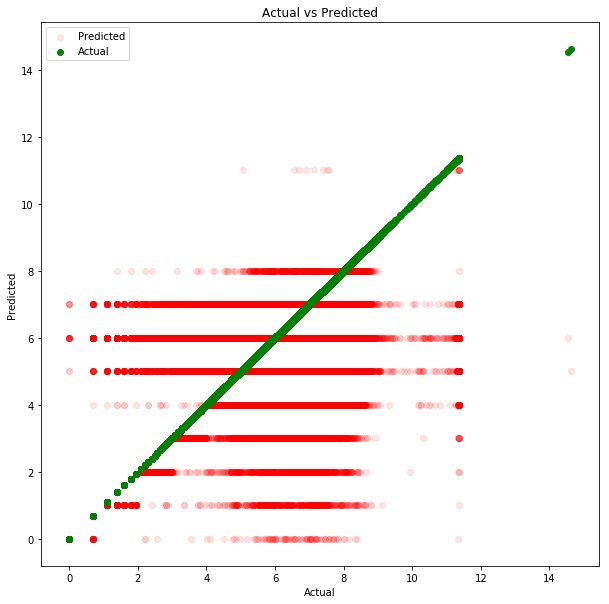

In [3]:
def plotAccuracy(actual, pred):
    plt.figure(figsize=(10,10))
    plt.title("Actual vs Predicted")
    plt.scatter(actual, pred, color="r", alpha=0.1, label="Predicted")
    plt.scatter(actual, actual, color="g", label="Actual")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.legend()
    plt.show()
plotAccuracy(y_train, pred)

<hr style="height: 1.0px;"/>

### Random Forrest - Leyan

Firstly, the importance of 16 features were calculated by only using 1% of all training data. 
Then random forest models can be built with different number of features. Besides, the number of trees also can be changed in the model.
A comparison can be made for the models in terms of accuracy and RMSE. 

In [22]:
database = train.dropna()
total_count = database.shape[0]
split = int(total_count*0.5)


train_rf_fs = database.sample(n=int(total_count*0.02), frac=None, replace=False,  weights=None, random_state=None, axis=None)
test_rf_fs = database.sample(n=total_count-int(total_count*0.02), frac=None, replace=False,  weights=None, random_state=None, axis=None)

train_rf = database.sample(n=int(total_count*0.75), frac=None, replace=False,  weights=None, random_state=None, axis=None)
test_rf = database.sample(n=total_count-int(total_count*0.75), frac=None, replace=False,  weights=None, random_state=None, axis=None)


train_rf.reset_index(drop=True, inplace=True)
test_rf.reset_index(drop=True, inplace=True)

In [23]:
x_train_rf_fs = train_rf_fs.drop('trip_duration',axis=1) # the feature data
y_train_rf_fs = train_rf_fs['trip_duration'] # the target
yt_fs = list(y_train_rf_fs) # the target list


x_train_rf = train_rf.drop('trip_duration',axis=1) # the feature data
y_train_rf = train_rf['trip_duration'] # the target
yt = list(y_train_rf) # the target list

x_test_rf = test_rf.drop('trip_duration',axis=1)
y_test_rf = test_rf['trip_duration']

In [24]:
mir_result = fs.mutual_info_regression(x_train_rf_fs, yt_fs) # mutual information regression feature ordering
print('done')
feature_scores = []
for i in np.arange(len(x_train_rf_fs.columns)):
    print(i)
    feature_scores.append([x_train_rf_fs.columns[i],mir_result[i]])
sorted_scores = sorted(np.array(feature_scores), key=lambda s: float(s[1]), reverse=True) 
sorted_scores

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


done
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


[array(['distanceTravelled', '0.552056830215979'], dtype='<U22'),
 array(['pickup_longitude', '0.06947132892687513'], dtype='<U22'),
 array(['pickup_latitude', '0.06474016325619925'], dtype='<U22'),
 array(['dropoff_latitude', '0.06316595869354735'], dtype='<U22'),
 array(['dropoff_longitude', '0.05040819214862413'], dtype='<U22'),
 array(['pickup_Hour', '0.012999317932556487'], dtype='<U22'),
 array(['weekday', '0.007851332722297322'], dtype='<U22'),
 array(['lateNight', '0.007538842209400709'], dtype='<U22'),
 array(['workTime', '0.002748247137192461'], dtype='<U22'),
 array(['store_and_fwd_flag', '0.0009596094027244373'], dtype='<U22'),
 array(['passenger_count', '0.00022500952431503407'], dtype='<U22'),
 array(['id', '0.0'], dtype='<U22'),
 array(['vendor_id', '0.0'], dtype='<U22'),
 array(['pickup_Year', '0.0'], dtype='<U22'),
 array(['pickup_Month', '0.0'], dtype='<U22'),
 array(['pickup_Day', '0.0'], dtype='<U22'),
 array(['pickup_Minute', '0.0'], dtype='<U22')]

In [ ]:
# np.save('scores_fea.npy',sorted_scores)

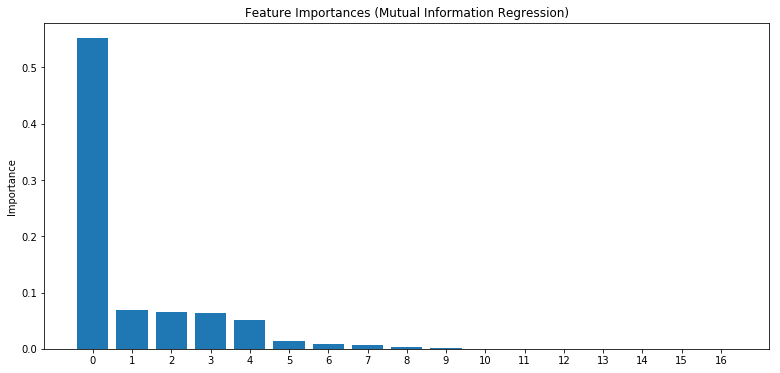

In [25]:
fig = plt.figure(figsize=(13,6))
ax = fig.add_subplot(111)
ind = np.arange(len(x_train_rf.columns))
plt.bar(ind,[float(i) for i in np.array(sorted_scores)[:,1]])
ax.axes.set_xticks(ind)
plt.title('Feature Importances (Mutual Information Regression)')
plt.ylabel('Importance')
# plt.xlabel('Trees in Forest')
# plt.grid()
plt.show()

In [26]:
def RF(sorted_scores,x_train,y_train,x_test,y_test,numFeatures):
    included_features = np.array(sorted_scores)[:,0][:numFeatures] # ordered list of important features
    
    X = x_train
    Y = y_train

    # define the number of estimators to consider
    estimators = [2,5,10,15,20,25,30] # the number of trees
    accuracy_list = []
    rmse_list = []
    
    yt = list(Y)
    np.random.seed(11111)
    # for each number of estimators, fit the model and find the results for 8-fold cross validation
    for i in estimators:
        print(i)
        model = rfr(n_estimators=i,max_depth=None)
        model.fit(X,Y)
        pred = model.predict(x_test)
        acc = accuracy(y_test, pred, percentage=0.2)
        rmse = sqrt(mean_squared_error(y_test, pred))
        accuracy_list.append(acc)
        rmse_list.append(rmse)
        
    return accuracy_list,rmse_list

In [28]:
# do not run it
#it takes a long time
numFeatures = 3
acc_3fea,rmse_3fea = RF(sorted_scores, x_train_rf, y_train_rf, x_test_rf, y_test_rf, numFeatures)

numFeatures = 5
acc_5fea,rmse_5fea = RF(sorted_scores, x_train_rf, y_train_rf, x_test_rf, y_test_rf, numFeatures)

numFeatures = 7
acc_7fea,rmse_7fea = RF(sorted_scores, x_train_rf, y_train_rf, x_test_rf, y_test_rf, numFeatures)

numFeatures = 10
acc_10fea,rmse_10fea = RF(sorted_scores, x_train_rf, y_train_rf, x_test_rf, y_test_rf, numFeatures)

In [ ]:
estimators = [2,5,10,15,20,25,30]

plt.title('Accuracy for different numbers of features')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.plot(estimators,acc_3fea,label='TOP 3 features')
plt.plot(estimators,acc_5fea,label='TOP 5 features')
plt.plot(estimators,acc_7fea,label='TOP 7 features')
plt.plot(estimators,acc_10fea,label='TOP 10 features')
plt.legend()
plt.show()


plt.title('RMSE for different numbers of features')
plt.xlabel('Number of trees')
plt.ylabel('RMSE')
plt.plot(estimators,rmse_3fea,label='TOP 3  features')
plt.plot(estimators,rmse_5fea,label='TOP 5 features')
plt.plot(estimators,rmse_7fea,label='TOP 7 features')
plt.plot(estimators,rmse_10fea,label='TOP 10 features')
plt.legend()
plt.show()

In [ ]:
def RF_50trees(sorted_scores,x_train,y_train,x_test,y_test,numFeatures):
    included_features = np.array(sorted_scores)[:,0][:numFeatures] # ordered list of important features
    
    X = x_train
    Y = y_train

    # define the number of estimators to consider
    estimators = [2,5,10,15,20,25,30,35,40,45,50] # the number of trees
    accuracy_list = []
    rmse_list = []
    
    yt = list(Y)
    np.random.seed(11111)
    # for each number of estimators, fit the model and find the results for 8-fold cross validation
    for i in estimators:
        print(i)
        model = rfr(n_estimators=i,max_depth=None)
        model.fit(X,Y)
        pred = model.predict(x_test)
        acc = accuracy(y_test, pred, percentage=0.2)
        rmse = sqrt(mean_squared_error(y_test, pred))
        accuracy_list.append(acc)
        rmse_list.append(rmse)
        
    return accuracy_list,rmse_list

In [ ]:
numFeatures = 3
acc_3fea_final,rmse_3fea_final = RF_50trees(sorted_scores, x_train_rf, y_train_rf, x_test_rf, y_test_rf, numFeatures)

estimators = [2,5,10,15,20,25,30,35,40,45,50]


plt.title('Accuracy')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.plot(estimators,acc_3fea_final)
plt.show()

plt.title('RMSE')
plt.xlabel('Number of trees')
plt.ylabel('RMSE')
plt.plot(estimators,rmse_3fea_final)
plt.show()

The best RF model

In [30]:
feature_names = ['pickup_longitude','dropoff_latitude','distanceTravelled']
pickle.dump(feature_names, open("savedModels/RF_model_1_features.pickle.dat", "wb")) 
pickle.dump(RF_1, open("savedModels/RF_model_1.pickle.dat","wb")) 

In [42]:
included_features = np.array(sorted_scores)[:,0][:3] 

X = x_train_rf
Y = y_train_rf

yt = list(Y)
np.random.seed(11111)

RF_1 = rfr(n_estimators=50,max_depth=None)
RF_1.fit(X,Y)
pred = RF_1.predict(x_test_rf)
acc = accuracy(y_test_rf, pred, percentage=0.2)
rmse = sqrt(mean_squared_error(y_test_rf, pred))

In [43]:
print('accuracy for 3 top features and 50 trees', acc)
print('RMSE top features and 50 trees',rmse)

accuracy for 3 top features and 50 trees 77.465092606935
RMSE top features and 50 trees 172.93498669420518


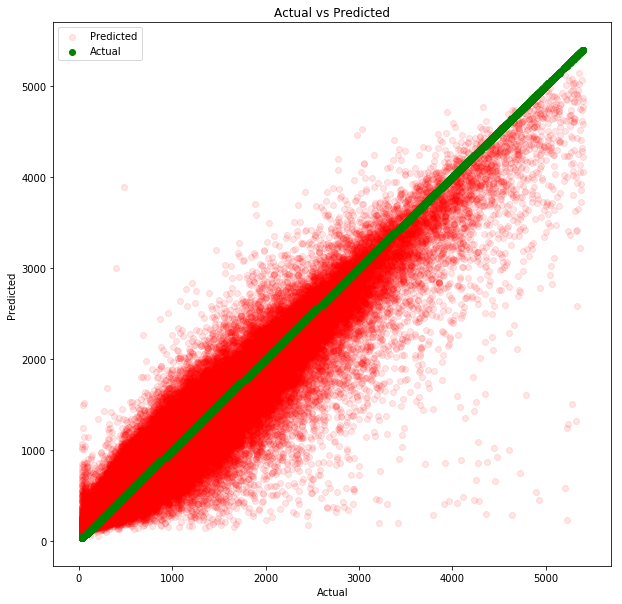

In [37]:
plotAccuracy(y_test_rf, pred)

<hr style="height: 1.0px;"/>

### Neural Network -Tzu-Yi Chen

* words *

In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from datetime import datetime,time
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
import keras.backend as K

C:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def loss(y_true, y_pred):
    y_pred = y_pred + 1
    y_true = y_true + 1
    return K.sqrt(K.mean(K.square(K.log(y_pred) - K.log(y_true))))

In [5]:
training_zip = zipfile.ZipFile('train.zip') 
testing_zip = zipfile.ZipFile('test.zip')

In [6]:
train = pd.read_csv(training_zip.open('train.csv'))
test = pd.read_csv(testing_zip.open('test.csv'))

In [15]:
display(train)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [16]:
train = train[train.trip_duration != 0]
y = np.log(train['trip_duration'])

drop_cols = ['id','trip_duration']

drop_train = train.drop('id', axis=1)
drop_train = train.drop('trip_duration', axis=1)



x_train, x_test, y_train, y_test = train_test_split(drop_train, y, test_size=0.25)


print('Taining total set size:',train.shape[0])
print('Training set size:', x_train.shape[0])
print('Test set size:', x_test.shape[0])

Taining total set size: 1458638
Training set size: 1093978
Test set size: 364660


In [17]:
# only use four features (pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude)

x_train = x_train.drop('id',axis=1)
x_train = x_train.drop('pickup_datetime',axis=1)
x_train = x_train.drop('dropoff_datetime',axis=1)
x_train = x_train.drop('store_and_fwd_flag',axis=1)
x_train = x_train.drop('vendor_id',axis=1)
x_train = x_train.drop('passenger_count',axis=1)

In [18]:
regression = Sequential()
regression.add(Dense(units = 32, kernel_initializer = 'uniform', activation='relu', input_dim = 4))
regression.add(Dropout(0.2))
regression.add(Dense(units = 32, kernel_initializer = 'uniform', activation='tanh'))
regression.add(Dense(units = 16, kernel_initializer = 'uniform', activation='relu'))
regression.add(Dropout(0.2))
regression.add(Dense(units = 16, kernel_initializer = 'uniform', activation='selu'))
regression.add(Dense(units = 8, kernel_initializer = 'uniform', activation='tanh'))
regression.add(Dropout(0.2))
regression.add(Dense(units = 8, kernel_initializer = 'uniform'))
regression.add(Dense(units = 1))
regression.compile(optimizer = 'adam', loss = loss)
regression.fit(x_train, y_train,batch_size=32,epochs=10)

Epoch 1/10
1093978/1093978 [==============================] - 51s 47us/step - loss: 0.1177
Epoch 2/10
1093978/1093978 [==============================] - 56s 51us/step - loss: 0.1105
Epoch 3/10
1093978/1093978 [==============================] - 51s 47us/step - loss: 0.1105
Epoch 4/10
1093978/1093978 [==============================] - 51s 46us/step - loss: 0.1105
Epoch 5/10
1093978/1093978 [==============================] - 50s 46us/step - loss: 0.1105
Epoch 6/10
1093978/1093978 [==============================] - 54s 49us/step - loss: 0.1105
Epoch 7/10
1093978/1093978 [==============================] - 51s 46us/step - loss: 0.1105
Epoch 8/10
1093978/1093978 [==============================] - 50s 46us/step - loss: 0.1105
Epoch 9/10
1093978/1093978 [==============================] - 50s 46us/step - loss: 0.1105
Epoch 10/10
1093978/1093978 [==============================] - 51s 47us/step - loss: 0.1105


In [19]:
# only use four features (pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude)

x_test = x_test.drop('id',axis=1)
x_test = x_test.drop('pickup_datetime',axis=1)
x_test = x_test.drop('dropoff_datetime',axis=1)
x_test = x_test.drop('store_and_fwd_flag',axis=1)
x_test = x_test.drop('vendor_id',axis=1)
x_test = x_test.drop('passenger_count',axis=1)

In [20]:
y_pred = regression.predict(x_test)

In [21]:
def accuracy(actual, predicted, percentage=0):
    #The two lists need to be of the same size
    if(len(actual) != len(predicted)):
        return np.nan
    
    if(percentage == 0):
        temp = actual == predicted
    else:
        temp = ((actual * percentage) <= predicted) & (predicted <= ((1 + percentage) * actual))
    
    return (sum(temp)/len(actual)*100)  

In [22]:
y_pred = y_pred.reshape(len(y_pred),)

In [23]:
print(accuracy(y_test ,y_pred, 0.2))

92.57884056381288


In [24]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms=sqrt(mean_squared_error(y_test ,y_pred))

In [25]:
print(rms)

0.79965364935376


In [26]:
def plotAccuracy(actual, pred):
    plt.figure(figsize=(10,10))
    plt.title("Actual vs Predicted")
    plt.scatter(actual, pred, color="r", alpha=0.1, label="Predicted")
    plt.scatter(actual, actual, color="g", label="Actual")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.legend()
    plt.show()

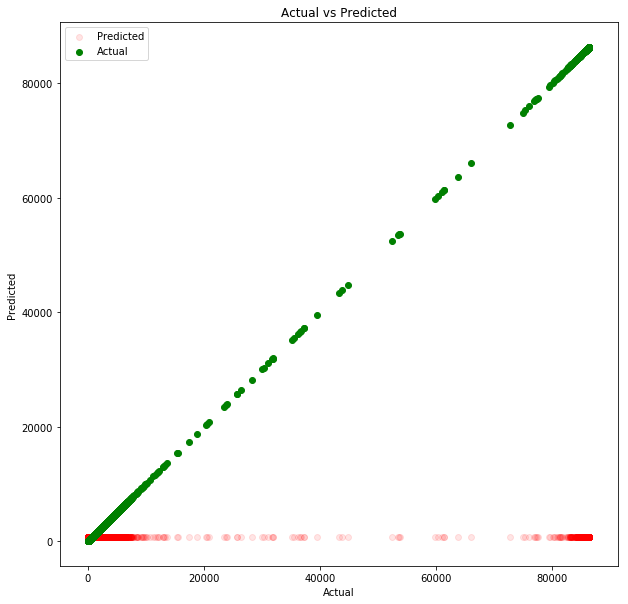

In [27]:
y_unlog = np.exp(y_pred)

plotAccuracy(np.exp(y_test), y_unlog)

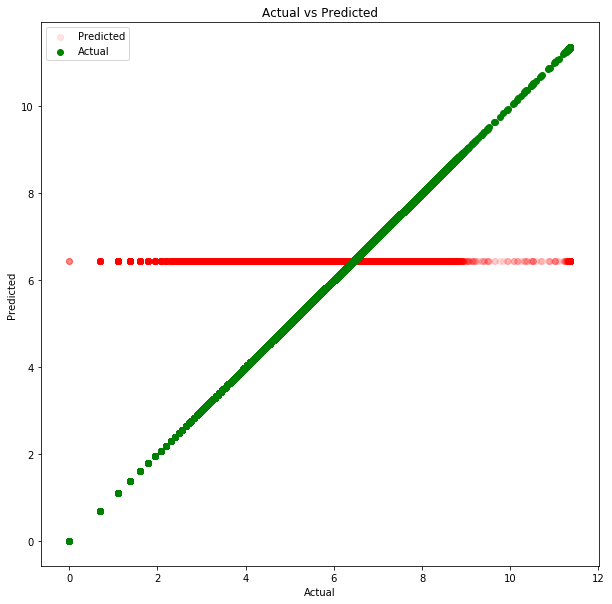

In [28]:
plotAccuracy(y_test, y_pred)

In [29]:
y_test = y_test.values

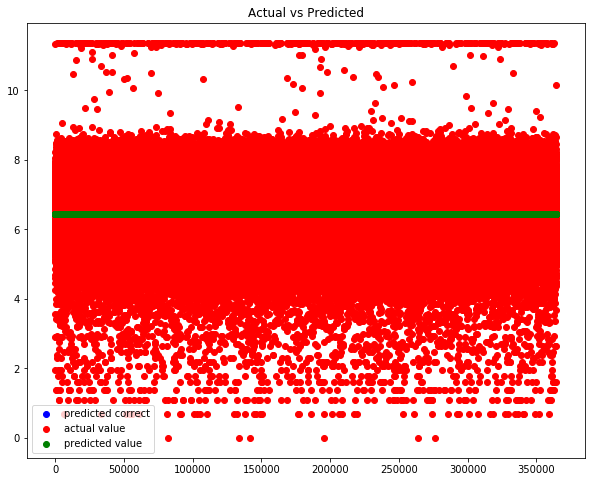

In [32]:
actvspred(y_test ,y_pred)

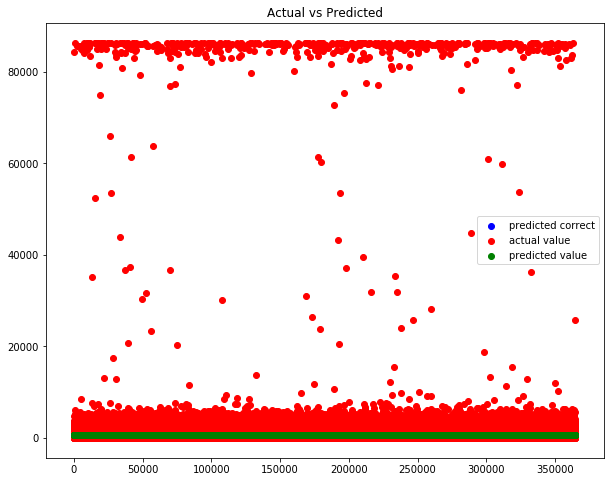

In [33]:
actvspred(np.exp(y_test), y_unlog)

<hr style="height: 1.0px;"/>

### LightGBM  - Caitlin

* words *

In [20]:
feature_names = ['vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'pickup_Year', 'pickup_Month',
       'pickup_Day', 'pickup_Hour', 'pickup_Minute']

target = np.log(X_train['trip_duration'] + 1).values
features = X_train[feature_names].values

test_target = np.log(X_test['trip_duration'] + 1).values
test_features = X_test[feature_names].values


train_data = lgb.Dataset(features, label=target)
test_data = lgb.Dataset(test_features, label=test_target)

params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['metric'] = 'l2'
params['sub_feature'] = 1
params['num_leaves'] = 1000
params['min_data'] = 50
params['max_depth'] = 15

num_round = 10
bst = lgb.train(params, train_data,500,valid_sets=[test_data])

#bst.save_model('model.txt')
pickle.dump(feature_names, open("savedModels/LGM_model_1_features.pickle.dat", "wb"))
pickle.dump(bst, open("savedModels/LGM_model_1.pickle.dat", "wb"))

ypred=bst.predict(features)
print(ypred[0:5])
print(target[0:5])

[1]	valid_0's l2: 0.540353
[2]	valid_0's l2: 0.538414
[3]	valid_0's l2: 0.536494
[4]	valid_0's l2: 0.534585
[5]	valid_0's l2: 0.532683
[6]	valid_0's l2: 0.530797
[7]	valid_0's l2: 0.528917
[8]	valid_0's l2: 0.52705
[9]	valid_0's l2: 0.525196
[10]	valid_0's l2: 0.523355
[11]	valid_0's l2: 0.521528
[12]	valid_0's l2: 0.519713
[13]	valid_0's l2: 0.517901
[14]	valid_0's l2: 0.516113
[15]	valid_0's l2: 0.514323
[16]	valid_0's l2: 0.512553
[17]	valid_0's l2: 0.510797
[18]	valid_0's l2: 0.509032
[19]	valid_0's l2: 0.507292
[20]	valid_0's l2: 0.505566
[21]	valid_0's l2: 0.50384
[22]	valid_0's l2: 0.502113
[23]	valid_0's l2: 0.500414
[24]	valid_0's l2: 0.498699
[25]	valid_0's l2: 0.497019
[26]	valid_0's l2: 0.495342
[27]	valid_0's l2: 0.493681
[28]	valid_0's l2: 0.492017
[29]	valid_0's l2: 0.490375
[30]	valid_0's l2: 0.488744
[31]	valid_0's l2: 0.4871
[32]	valid_0's l2: 0.485488
[33]	valid_0's l2: 0.483877
[34]	valid_0's l2: 0.482283
[35]	valid_0's l2: 0.480684
[36]	valid_0's l2: 0.479097
[37]	

[289]	valid_0's l2: 0.261342
[290]	valid_0's l2: 0.260949
[291]	valid_0's l2: 0.26054
[292]	valid_0's l2: 0.260135
[293]	valid_0's l2: 0.25972
[294]	valid_0's l2: 0.259342
[295]	valid_0's l2: 0.258933
[296]	valid_0's l2: 0.258534
[297]	valid_0's l2: 0.258162
[298]	valid_0's l2: 0.257758
[299]	valid_0's l2: 0.257365
[300]	valid_0's l2: 0.256965
[301]	valid_0's l2: 0.25661
[302]	valid_0's l2: 0.256218
[303]	valid_0's l2: 0.255855
[304]	valid_0's l2: 0.255493
[305]	valid_0's l2: 0.255122
[306]	valid_0's l2: 0.25474
[307]	valid_0's l2: 0.25437
[308]	valid_0's l2: 0.254024
[309]	valid_0's l2: 0.253669
[310]	valid_0's l2: 0.253292
[311]	valid_0's l2: 0.252928
[312]	valid_0's l2: 0.252572
[313]	valid_0's l2: 0.252215
[314]	valid_0's l2: 0.251856
[315]	valid_0's l2: 0.251515
[316]	valid_0's l2: 0.251144
[317]	valid_0's l2: 0.250812
[318]	valid_0's l2: 0.25047
[319]	valid_0's l2: 0.250113
[320]	valid_0's l2: 0.249775
[321]	valid_0's l2: 0.249425
[322]	valid_0's l2: 0.24909
[323]	valid_0's l2: 0

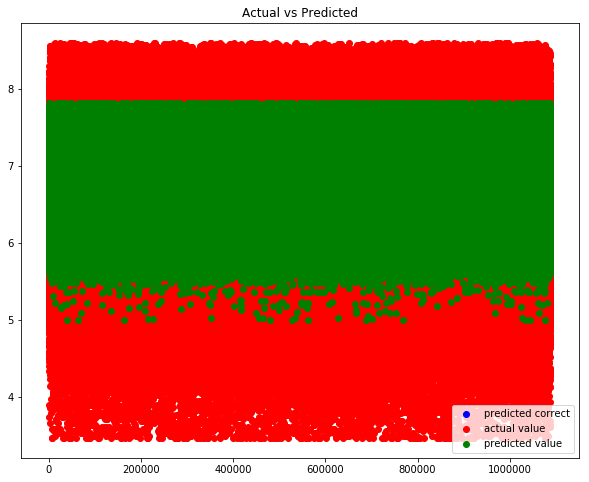

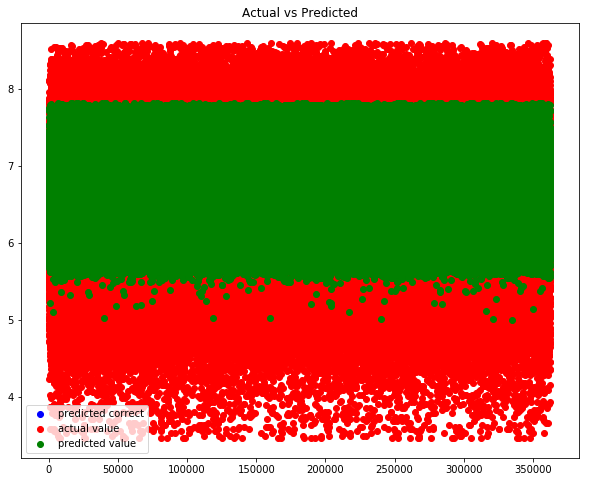

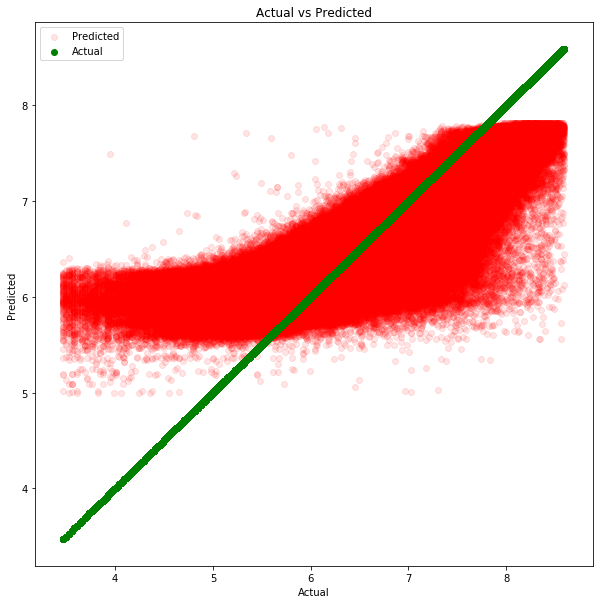

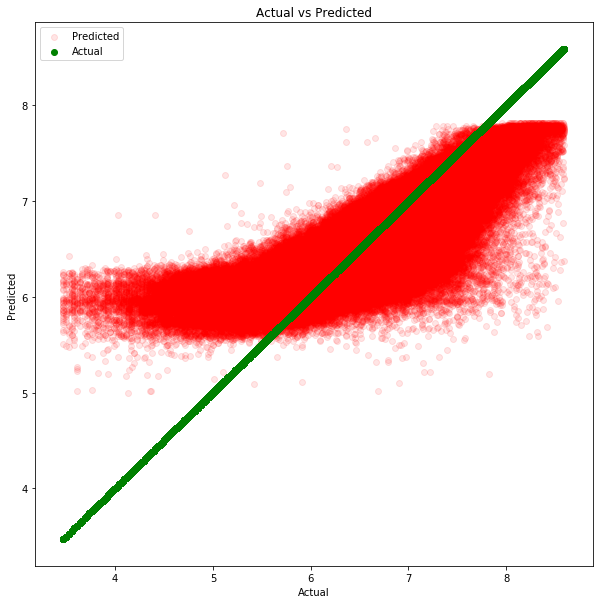

In [21]:
lightgbm_predict_train = bst.predict(features)
lightgbm_predict_test = bst.predict(test_features)

actvspred(target, lightgbm_predict_train)
actvspred(test_target,lightgbm_predict_test)

print(accuracy(target, lightgbm_predict_train,percentage=0.1))
print(accuracy(target, lightgbm_predict_train,percentage=0.2))
plotAccuracy(target, lightgbm_predict_train)
print(accuracy(test_target,lightgbm_predict_test,percentage=0.1))
print(accuracy(test_target,lightgbm_predict_test,percentage=0.2))
plotAccuracy(test_target,lightgbm_predict_test)

<hr style="height: 1.0px;"/>

### Frankenstein's Monstrous Regression Model - Connor

Can some one programme a method that takes $n$ models as input and takes 'x' data as input and calls the 'test' method from each model? 


In [78]:
#Pickle model and feature names
saveFolder = "savedModels/"
#modelList = ["XGB_model_4.pickle.dat","LGM_model_1_features.pickle.dat"]
#featureList = ["XGB_model__features.pickle.dat","LGM_model_1.pickle.dat"]

#Testing
modelList = ["XGB_model_4.pickle.dat","XGB_model_4.pickle.dat"]
featureList = ["XGB_model_4_features.pickle.dat","XGB_model_4_features.pickle.dat"]

#X_train, X_test

#Extending the training features to include the all the features from the weather
# dataset and the OSRM dataset
finalTrainDataset, feature_names = createFinalDataset()
finalTestDataset, feature_names = createFinalDataset(dataset="Test")

Train RMSE: 5.423047  || Accuracy within 5%:  0.0
Test RMSE: 5.423456  || Accuracy within 5%:  0.0


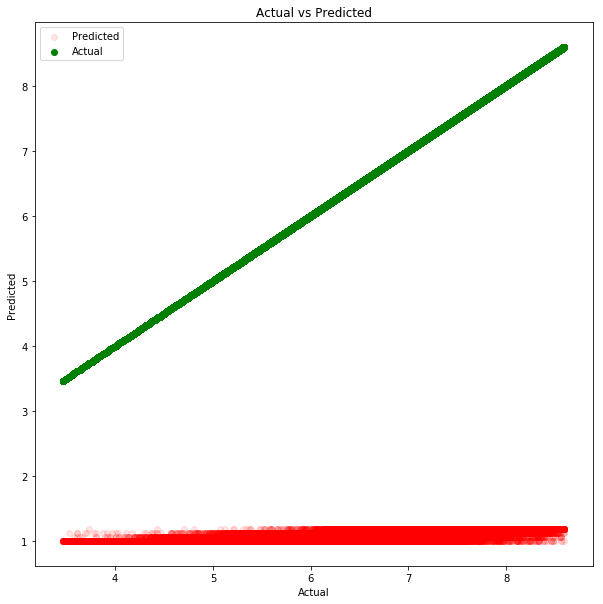

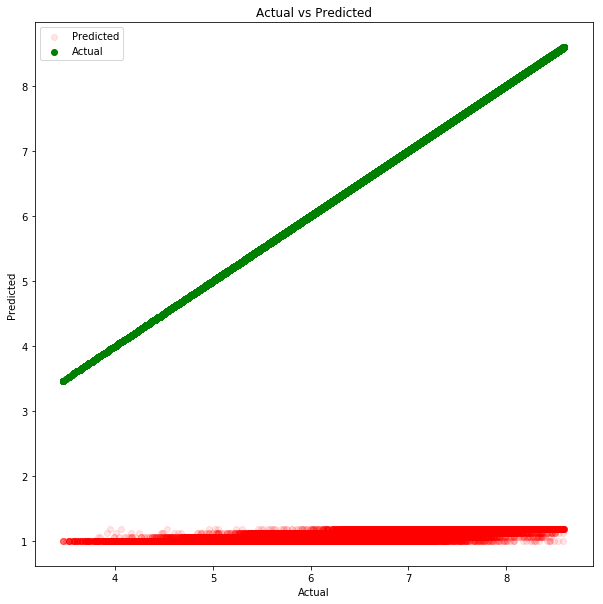

In [85]:
trainPredictions = []
testPredictions = []
for modelFile, featuresFile in zip(modelList, featureList):
    model = pickle.load(open(saveFolder + modelFile, 'rb'))
    modelFeautes = pickle.load(open(saveFolder + featuresFile, 'rb'))
    
    #Selecting the models features from the finalTrainDataset    
    trainFeatures = finalTrainDataset[modelFeautes].values 
    
    #Selecting the models features from the finalTestDataset    
    testFeatures = finalTestDataset[modelFeautes].values 
    
    trainPred = model.predict(trainFeatures)
    testPred = model.predict(testFeatures)
    
    trainPredictions.append(trainPred)
    testPredictions.append(testPred)
    
    
trainArray = np.asarray(trainPredictions)
testArray = np.asarray(testPredictions)

trainEnsemblePrediction = np.mean(trainArray, axis=0)
testEnsemblePrediction = np.mean(testArray, axis=0)

trainTarget = np.log(finalTrainDataset['trip_duration'] + 1)
testTarget = np.log(finalTestDataset['trip_duration'] + 1)

print("Train RMSE:", round(np.sqrt(mean_squared_error(trainTarget, trainEnsemblePrediction)),6), 
              " || Accuracy within 5%: ", accuracy(trainTarget, trainEnsemblePrediction, 0.05))

print("Test RMSE:", round(np.sqrt(mean_squared_error(testTarget, testEnsemblePrediction)),6), 
              " || Accuracy within 5%: ", accuracy(testTarget, testEnsemblePrediction, 0.05))
        
plotAccuracy(trainTarget, trainEnsemblePrediction)
plotAccuracy(testTarget, testEnsemblePrediction)
    